In [1]:
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from scipy.fft import fftshift
import pyACA

In [2]:
#10sec-20sec data has been taken
ch_names=['EEG Fp1','EEG Fp2','EEG F3','EEG F4','EEG F7','EEG F8','EEG T3','EEG T4','EEG C3','EEG C4','EEG T5','EEG T6','EEG P3','EEG P4','EEG O1','EEG O2','EEG Fz','EEG Cz','EEG Pz']#,'EEG A2-A1','ECG ECG','EDF Annotations']
sfreq=500
start_time = 10 
end_time = 20
info=mne.create_info(ch_names=ch_names,sfreq=sfreq)

## Reading only Subject00's resting & during data

In [3]:
df1=pd.read_csv(r"C:\Users\Riyanka Dey\Desktop\Dataset\EEG_Project\main data\Subject00_1.csv",sep='\t',header=None)
df1=df1.iloc[0:90000,1:20]

df2=pd.read_csv(r"C:\Users\Riyanka Dey\Desktop\Dataset\EEG_Project\main data\Subject00_2.csv",sep='\t',header=None)
df2=df2.iloc[0:30000,1:20]

print("Subject00_1 -> ", df1.shape)
print("Subject00_2 -> ", df2.shape)

print("\nSubject00_1-> \n",df1)
print("Subject00_2-> \n",df2)

Subject00_1 ->  (90000, 19)
Subject00_2 ->  (30000, 19)

Subject00_1-> 
          1      2     3     4     5     6     7     8     9     10    11  \
0     -6735   3084 -5562 -7061 -4125 -3169  2220 -3030 -6036 -5329   240   
1     -7104   2703 -5830 -7257 -4260 -3320  2656 -2355 -5741 -5049   753   
2     -7554   2298 -6228 -7554 -4365 -3433  3273 -1488 -5428 -4752  1439   
3     -8024   1951 -6735 -7933 -4428 -3446  4027  -522 -5153 -4495  2254   
4     -8442   1738 -7298 -8355 -4459 -3304  4844   423 -4963 -4322  3133   
...     ...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
89995 -1736   7924 -2352 -3109 -4778  2000   477 -6951 -5197 -4396 -2093   
89996 -1860   8373 -2771 -2974 -5765  3159  -190 -5347 -5450 -3647 -2356   
89997 -1773   9062 -3116 -2881 -6405  4373  -842 -3749 -5543 -2743 -2595   
89998 -1565   9861 -3419 -2907 -6652  5511 -1414 -2251 -5522 -1804 -2809   
89999 -1382  10581 -3751 -3160 -6535  6402 -1861  -977 -5480 -1015 -3023   

          12  

## Creating RawArray as it would be easier to plot 

In [4]:
raw1=mne.io.RawArray(df1.transpose(),info)
raw2=mne.io.RawArray(df2.transpose(),info)

Creating RawArray with float64 data, n_channels=19, n_times=90000
    Range : 0 ... 89999 =      0.000 ...   179.998 secs
Ready.
Creating RawArray with float64 data, n_channels=19, n_times=30000
    Range : 0 ... 29999 =      0.000 ...    59.998 secs
Ready.


## Channel Visualization (For Subject_00)

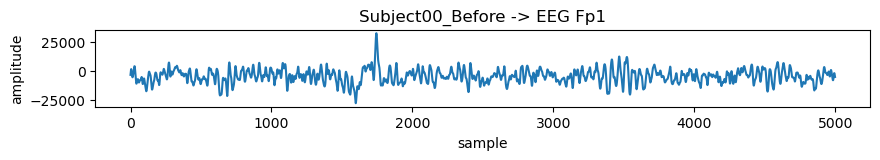

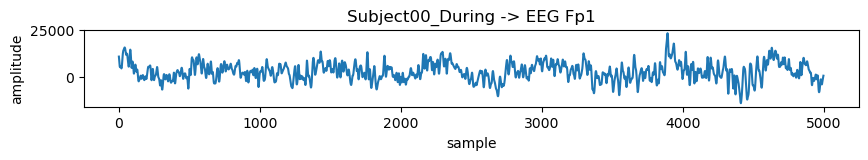

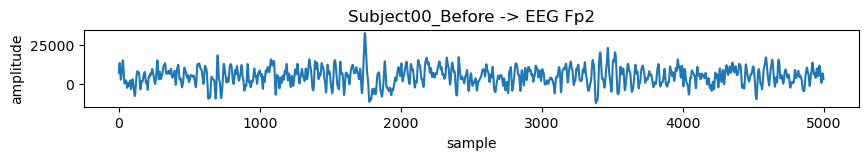

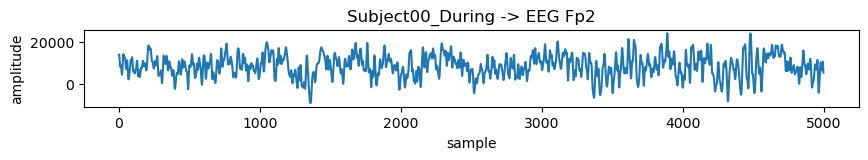

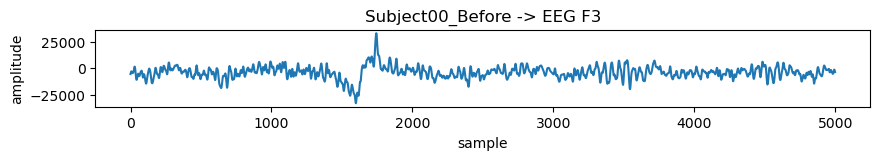

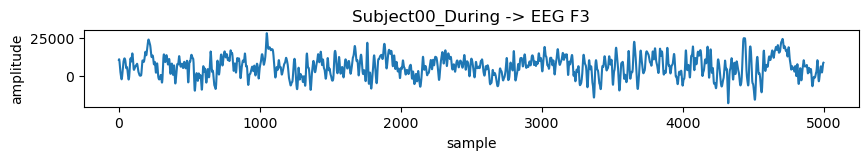

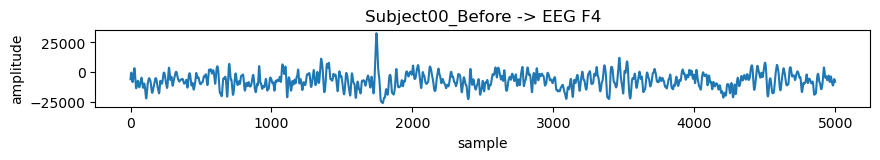

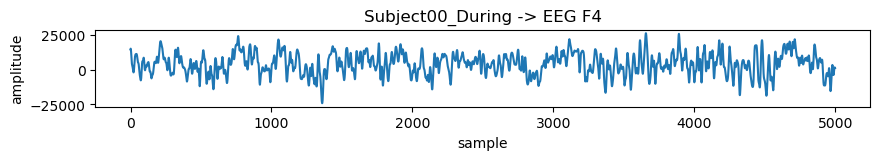

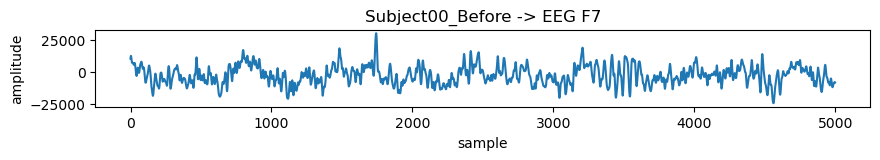

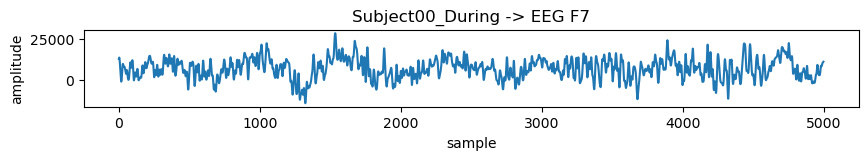

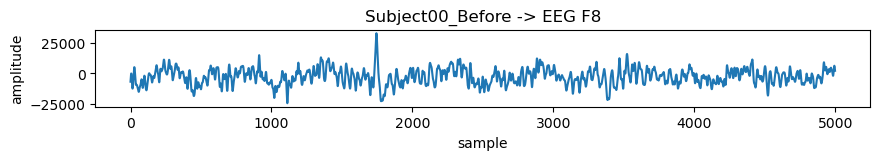

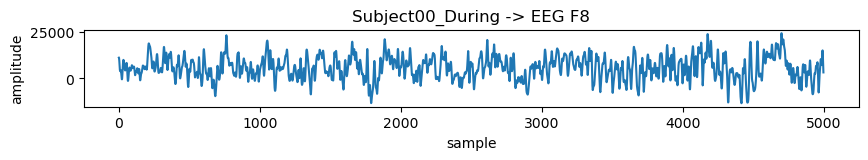

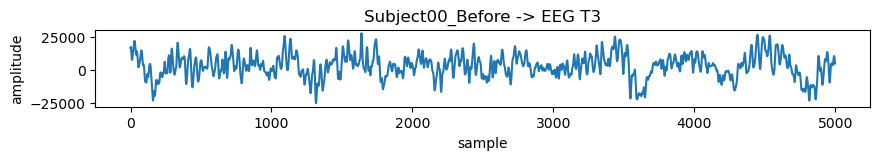

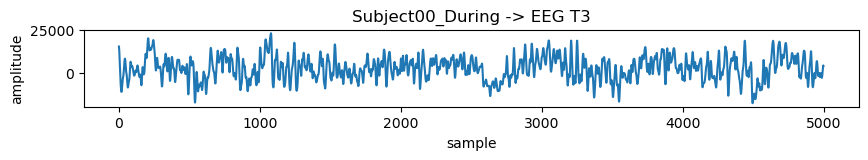

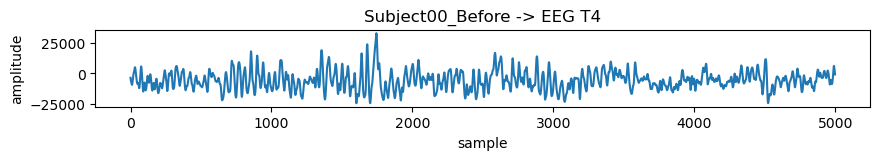

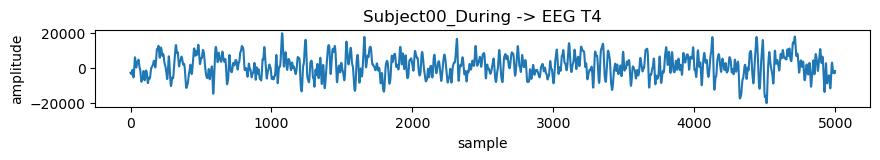

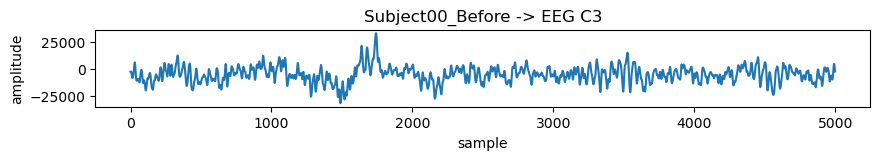

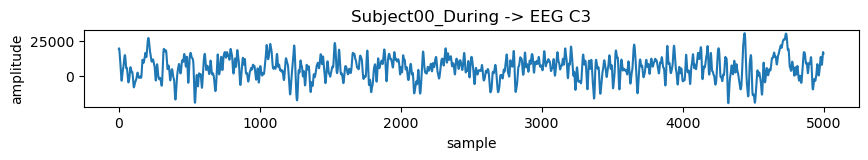

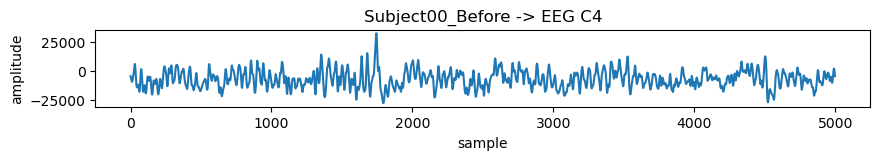

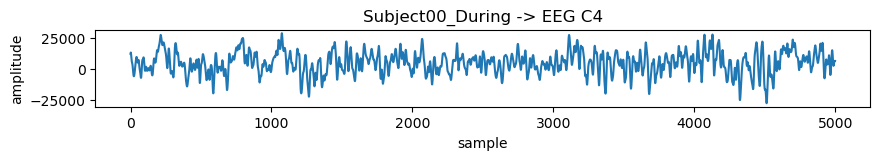

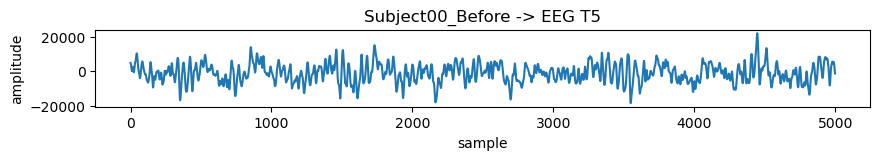

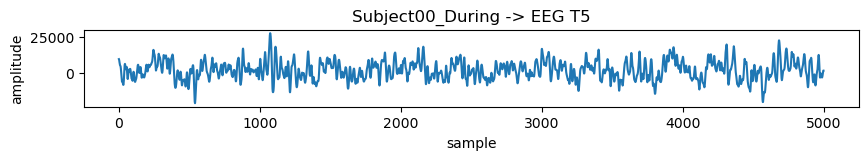

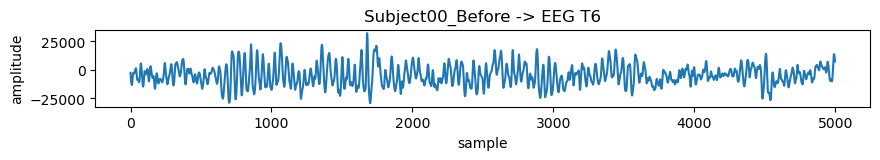

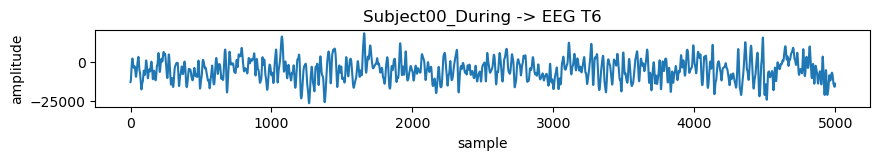

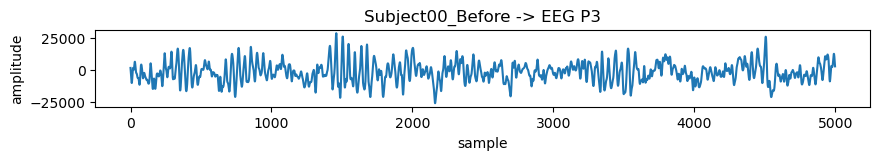

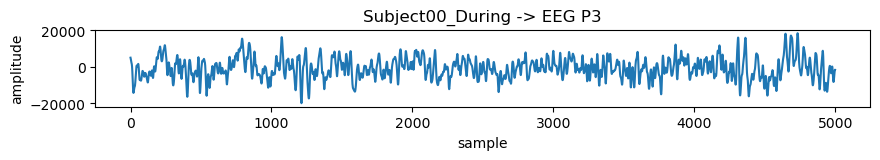

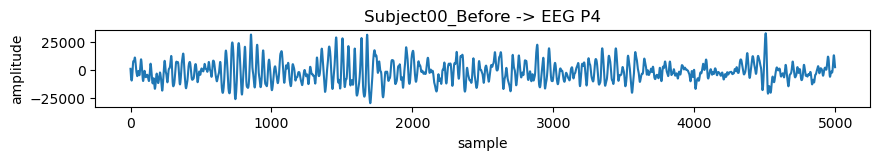

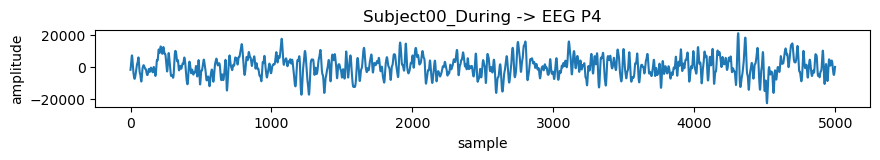

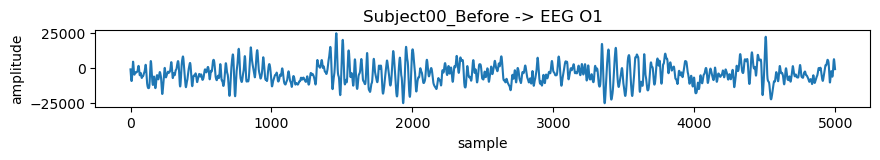

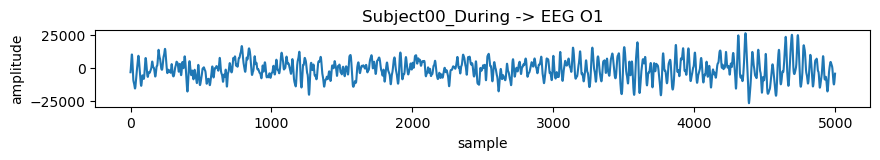

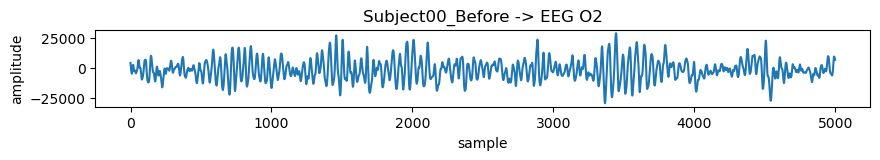

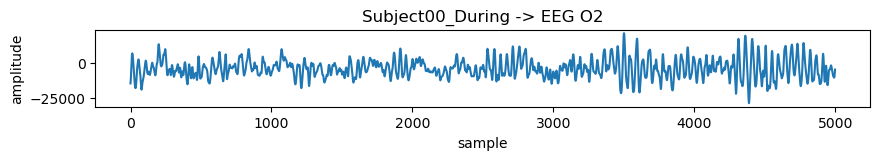

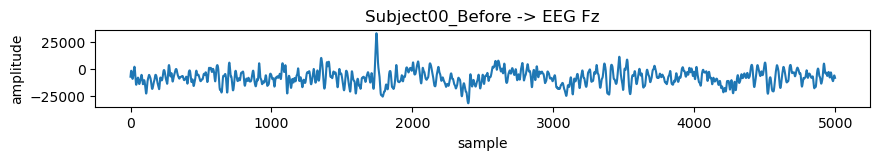

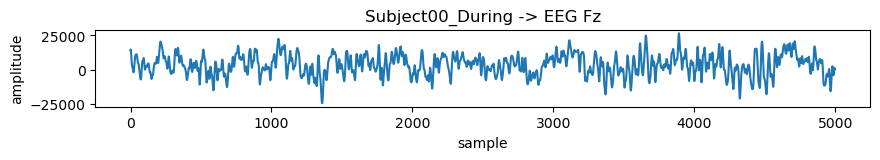

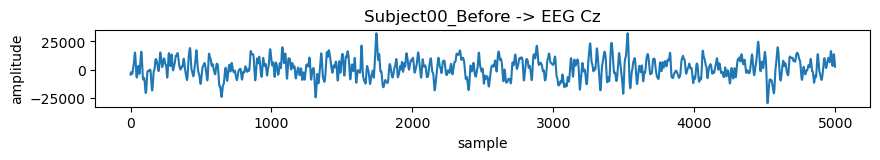

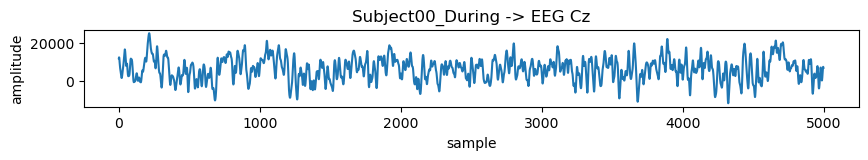

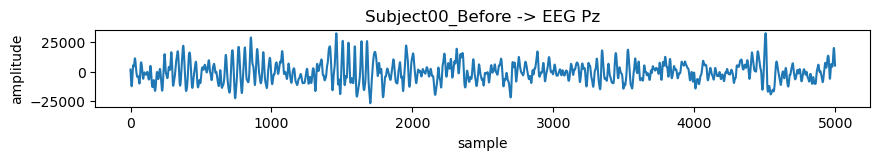

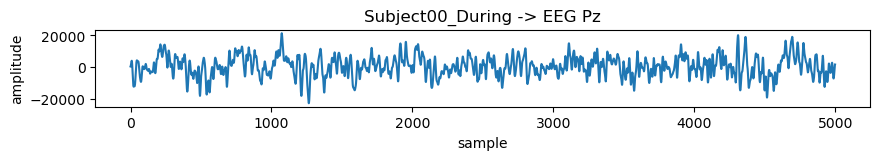

In [5]:
for ch in ch_names:
    fig1, ax1 = plt.subplots(figsize=[10, 1])
    ch_n='Subject00_Before -> '+ch
    plt.title(ch_n)
    plt.xlabel('sample')
    plt.ylabel('amplitude')
    ax1.plot(raw1.get_data(picks=[ch], tmin=start_time, tmax=end_time).T) # T -> transposing the data to match the format
    plt.show()

    fig2, ax2 = plt.subplots(figsize=[10,1])
    ch_n='Subject00_During -> '+ch
    plt.title(ch_n)
    plt.xlabel('sample')
    plt.ylabel('amplitude')
    ax2.plot(raw2.get_data(picks=[ch], tmin=start_time, tmax=end_time).T)
    plt.show()

## plotting the whole signal of channel-1 for Subject_00 during metal Arithmatic task

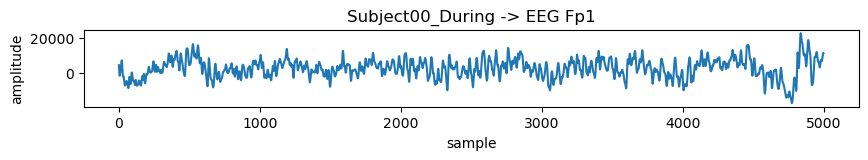

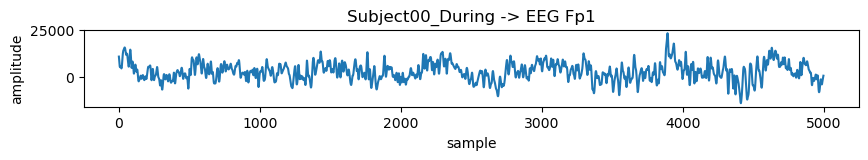

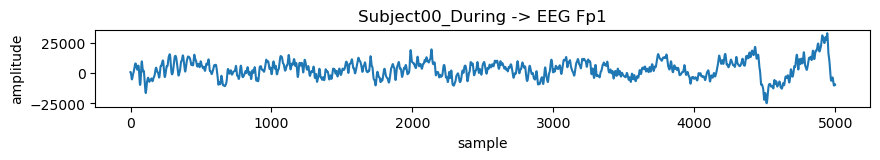

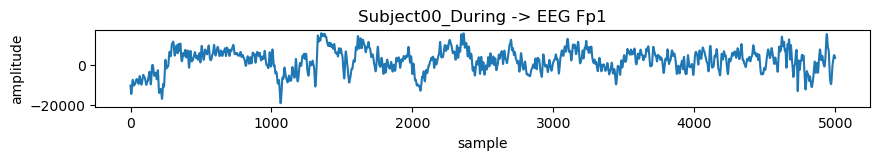

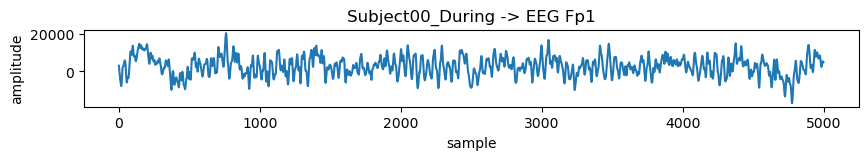

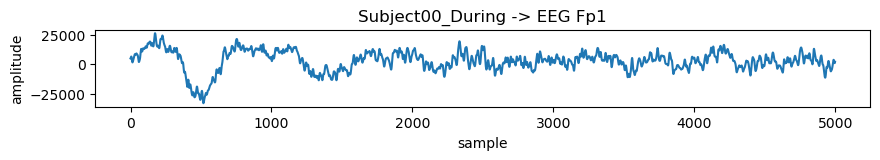

In [6]:
start=0
end=10
while end<=60:
#     fig1, ax1 = plt.subplots(figsize=[10, 1])
#     ch_n='Subject00_Before -> CH 1'
#     plt.title(ch_n)
#     plt.xlabel('time')
#     plt.ylabel('amplitude')
#     ax1.plot(raw1.get_data(picks=['CH 1'], tmin=start, tmax=end).T) # T -> transposing the data to match the format
#     plt.show()

    fig2, ax2 = plt.subplots(figsize=[10,1])
    ch_n='Subject00_During -> '+ch_names[0]
    plt.title(ch_n)
    plt.xlabel('sample')
    plt.ylabel('amplitude')
    ax2.plot(raw2.get_data(picks=[ch_names[0]], tmin=start, tmax=end).T)
    plt.show()
    
    start=start+10
    end=end+10

## Spectogram of Subject_00  

In [7]:
# Define spectrogram parameters
fs = 500  # Sampling frequency of the EEG signal
#window = 'hann'  # Windowing function to use
nperseg = int(fs * 2)  # Length of each segment for spectrogram (2 seconds)
noverlap = int(fs)  # Overlap between segments (1 seconds)
nfft = int(fs * 2)  # Number of FFT points (2 seconds)


C:\Users\Riyanka Dey\AppData\Local\Temp\ipykernel_15240\3569699641.py:13: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(time,fftshift(freq), fftshift(spectogram, axes=0), shading='nearest')#'gouraud')


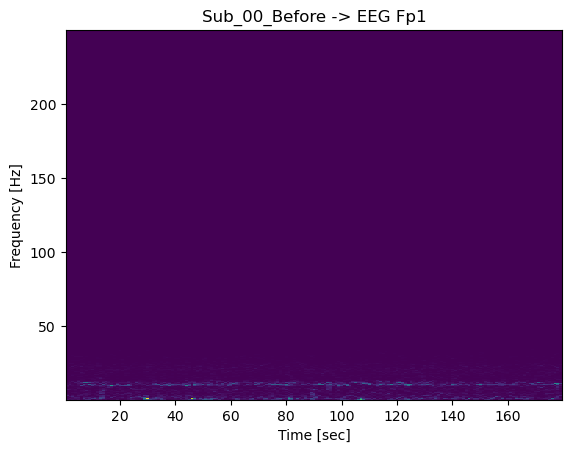

C:\Users\Riyanka Dey\AppData\Local\Temp\ipykernel_15240\3569699641.py:24: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(time,fftshift(freq), fftshift(spectogram, axes=0), shading='nearest')#'gouraud')


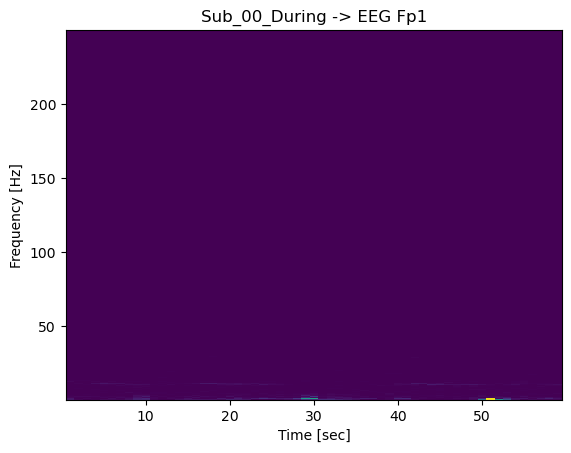

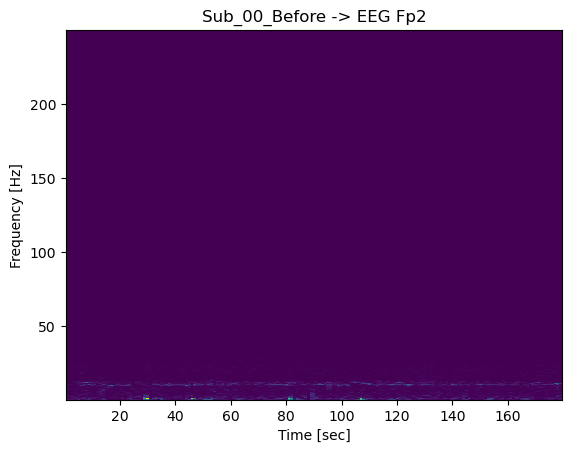

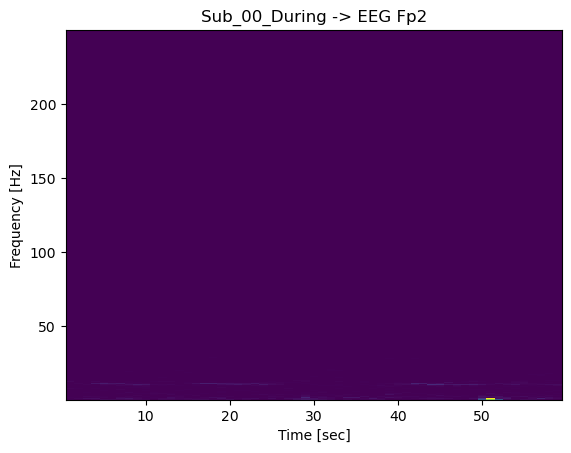

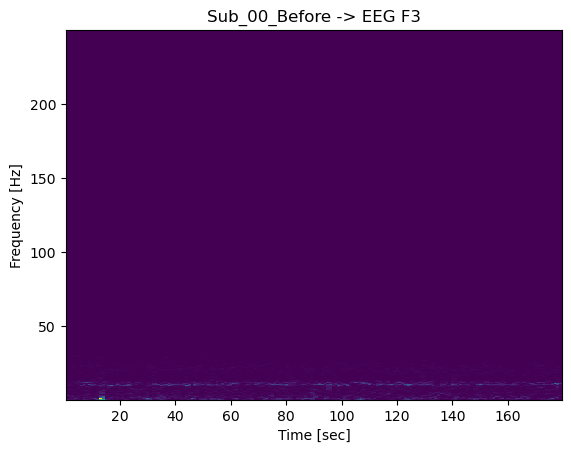

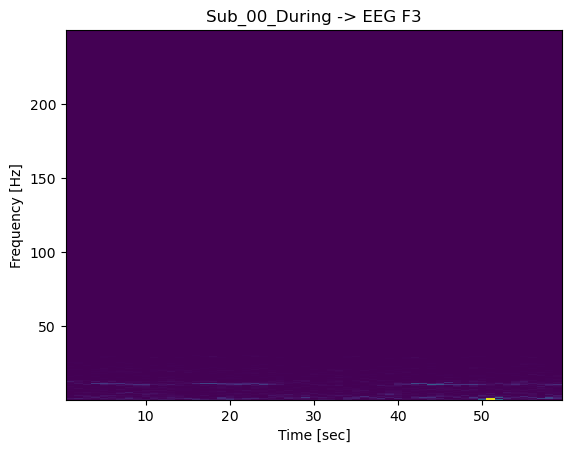

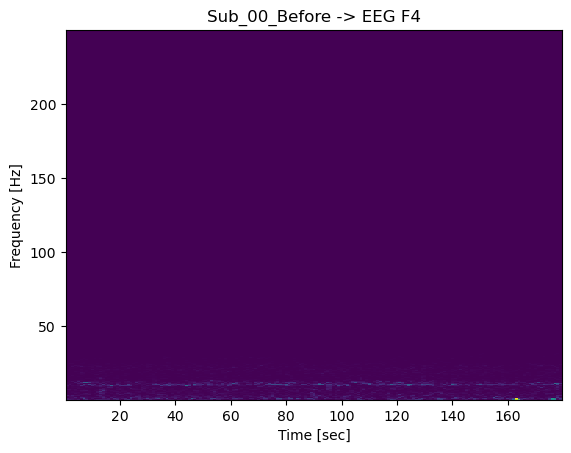

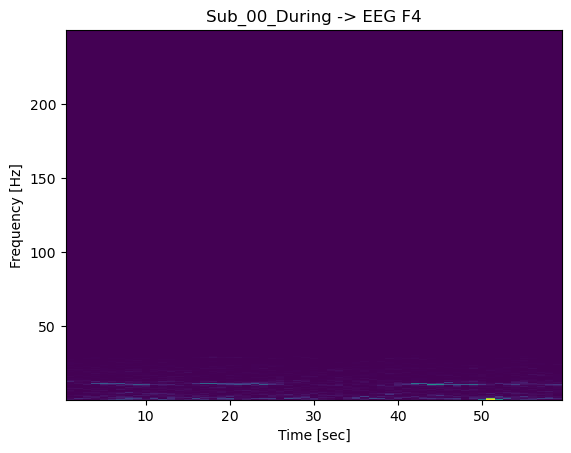

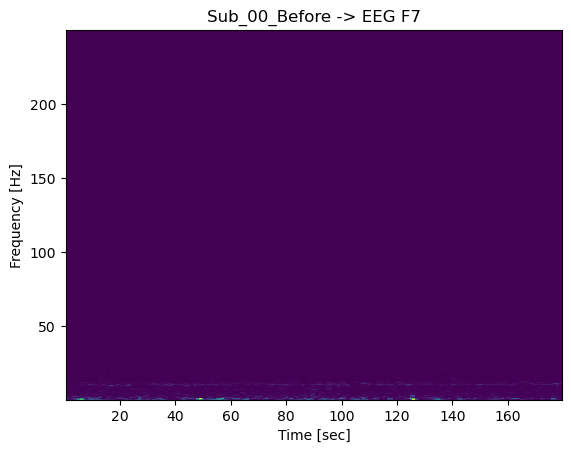

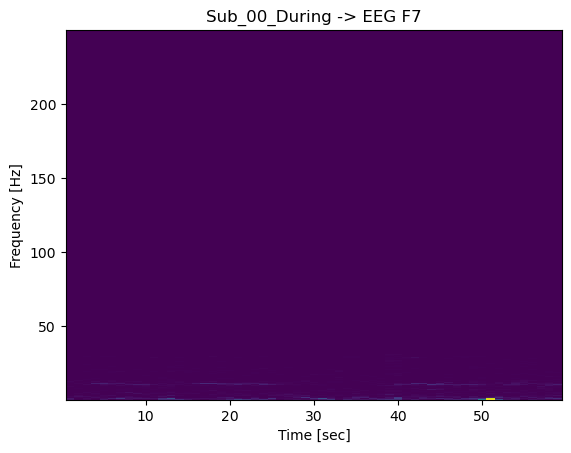

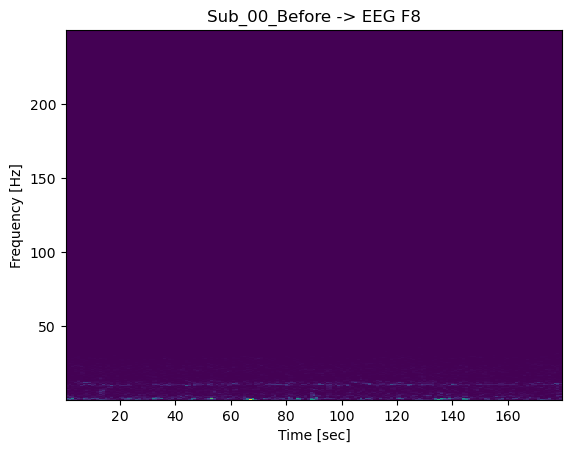

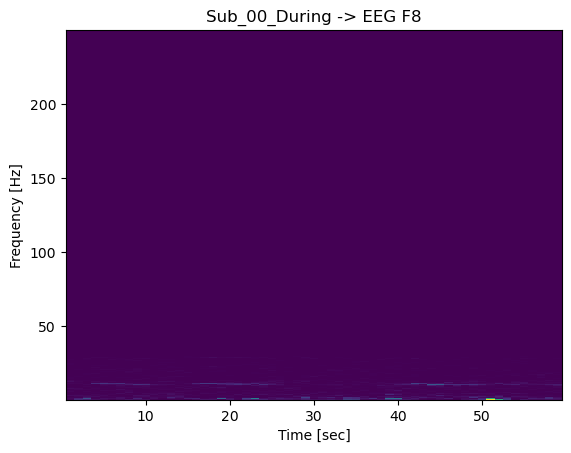

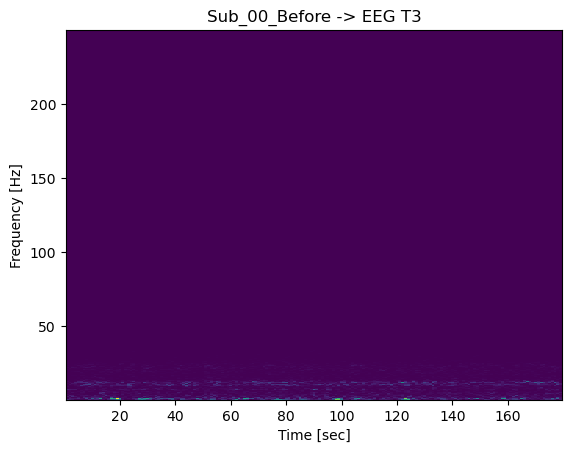

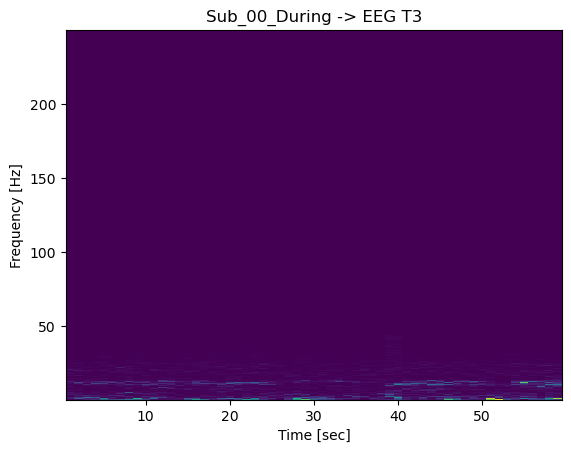

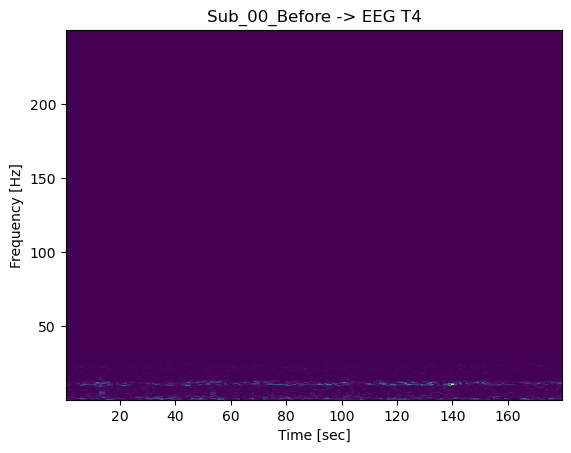

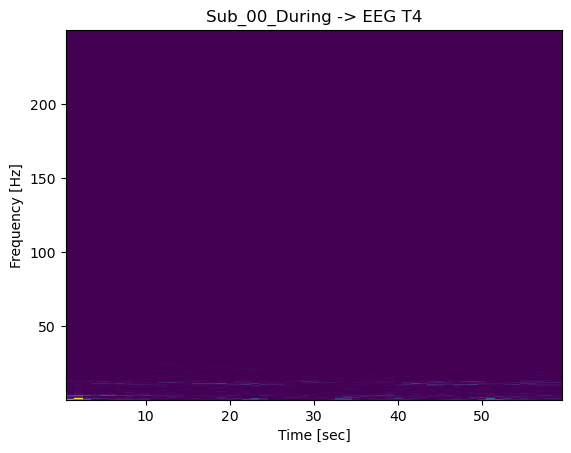

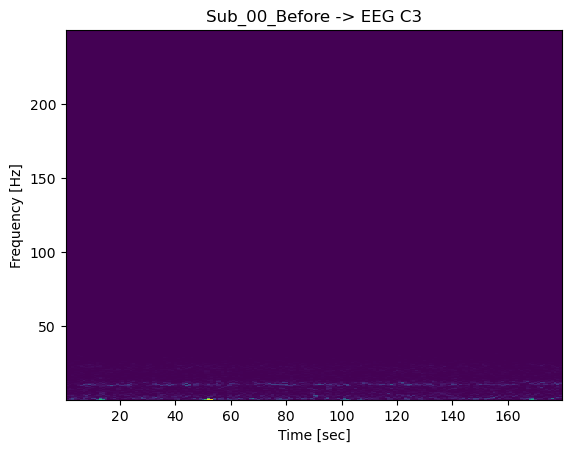

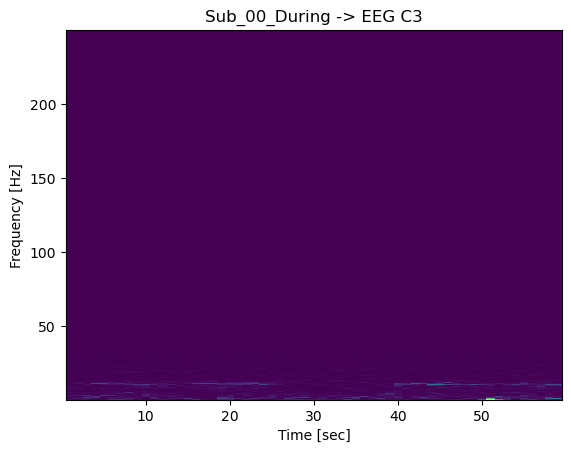

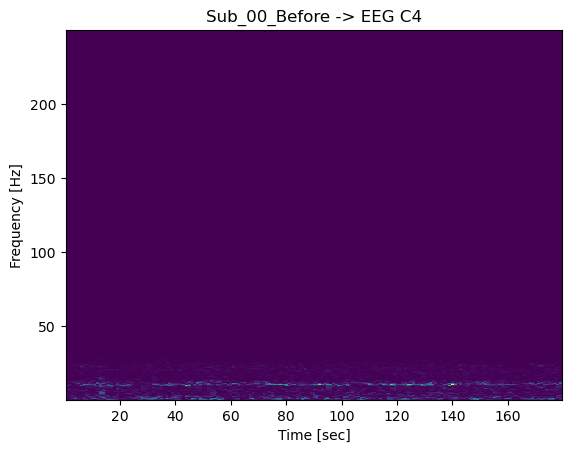

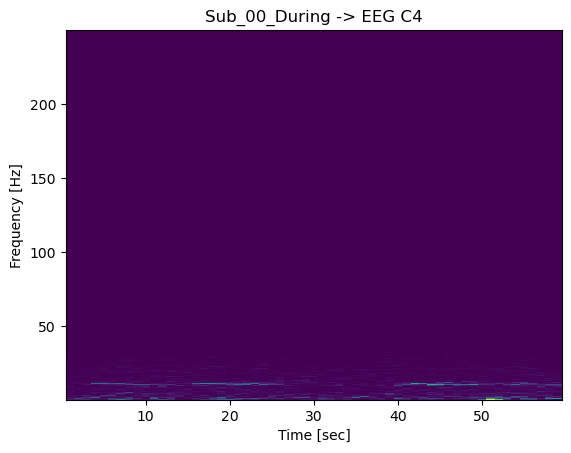

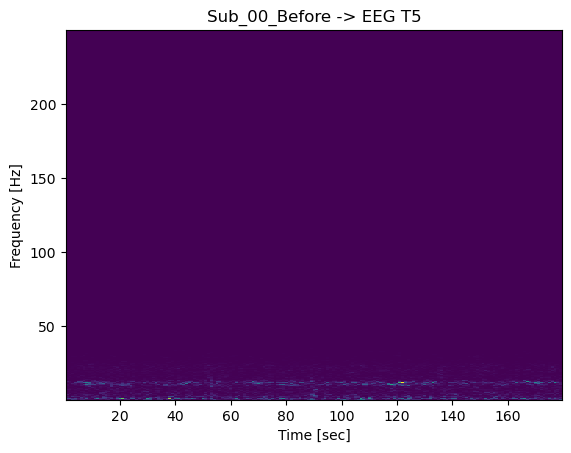

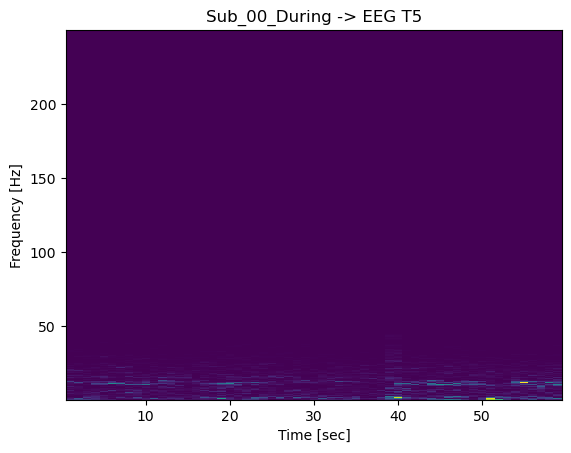

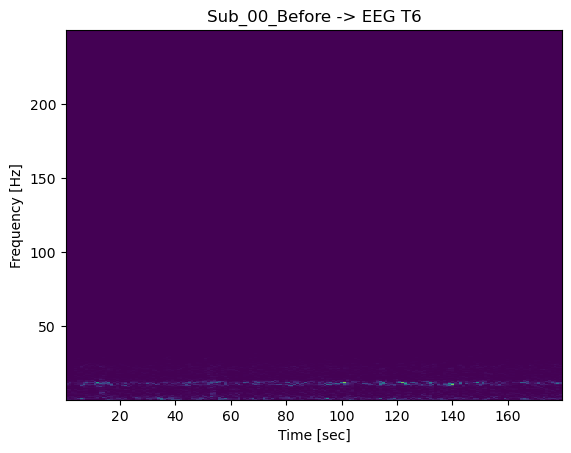

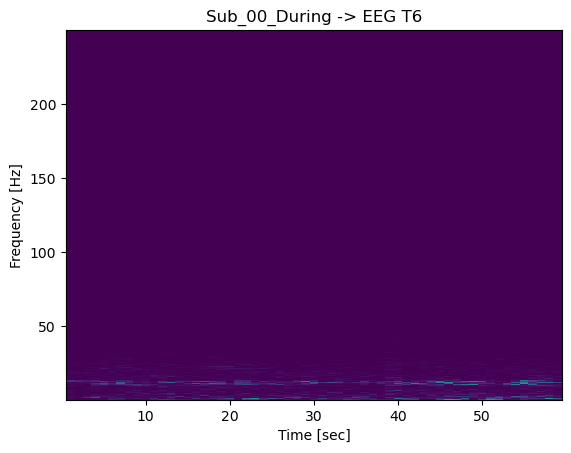

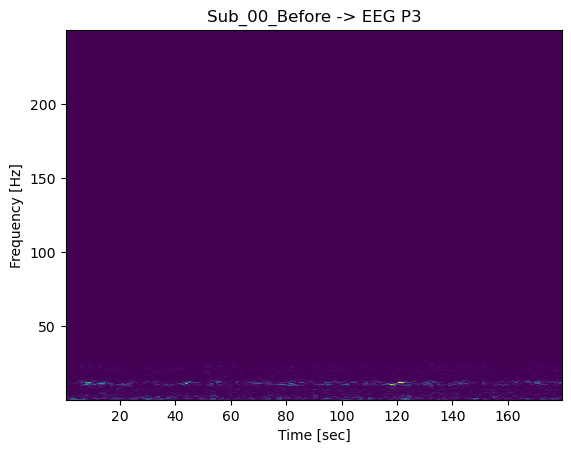

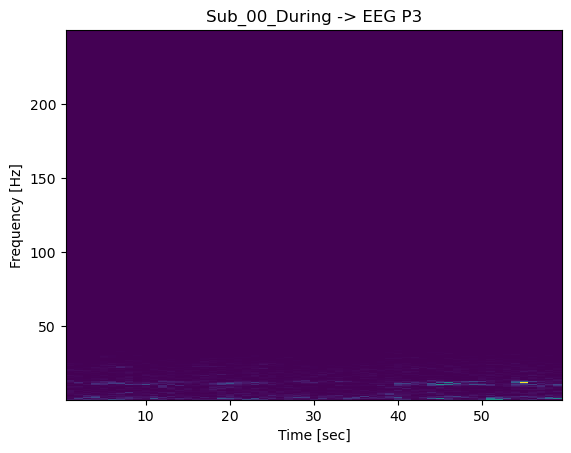

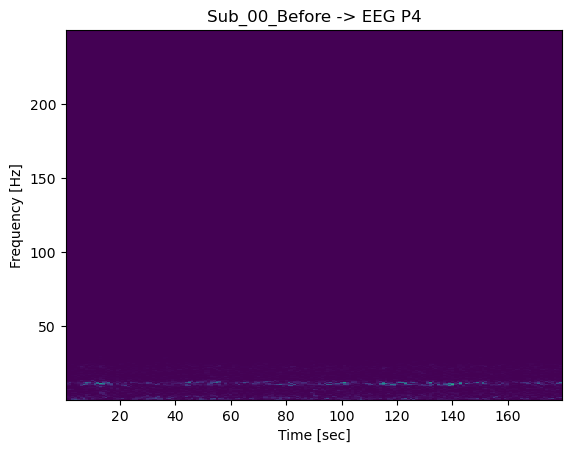

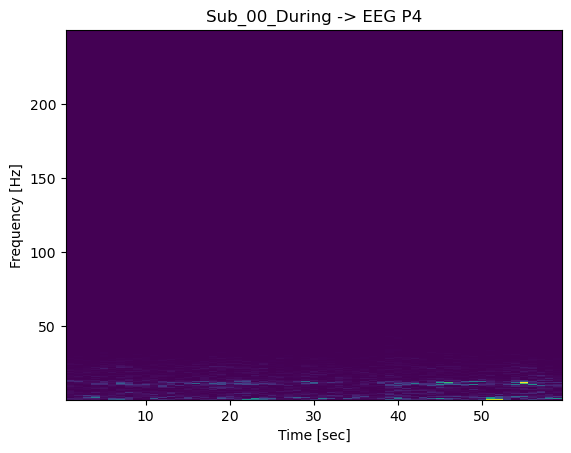

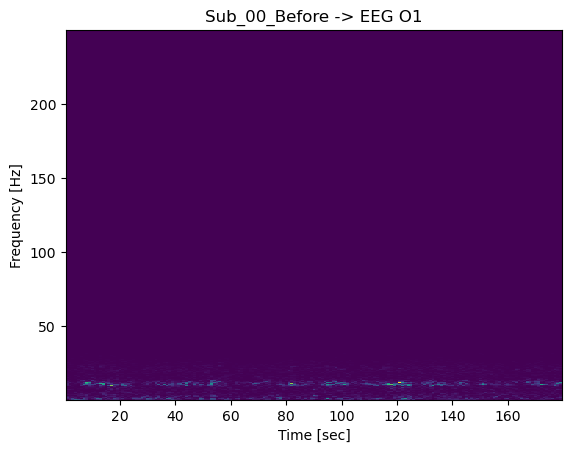

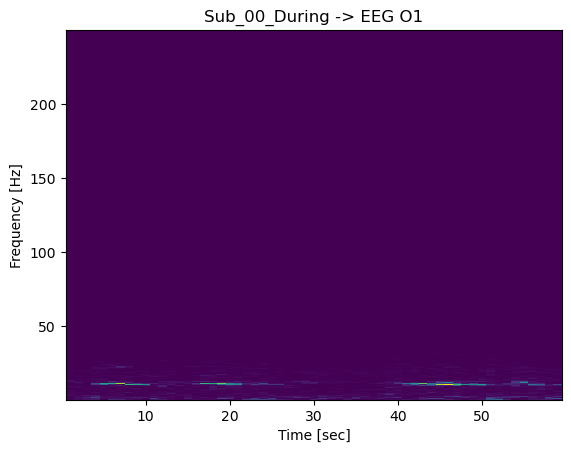

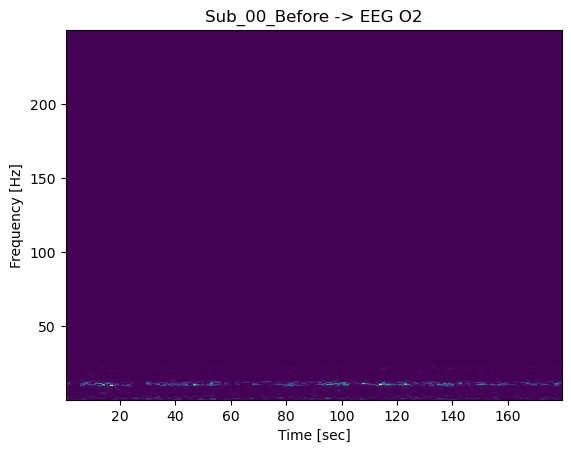

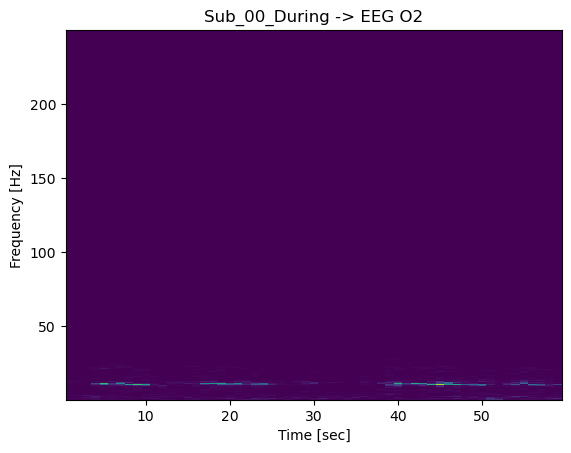

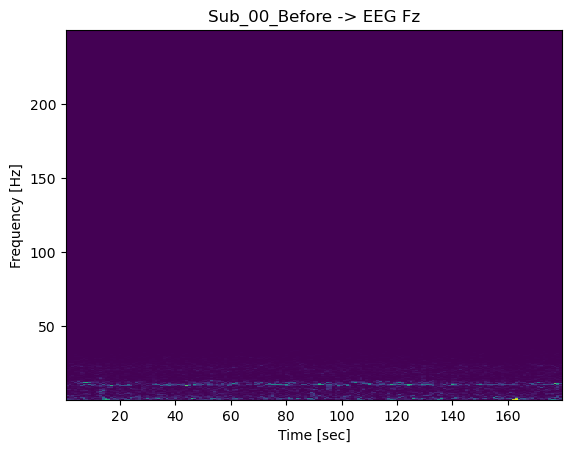

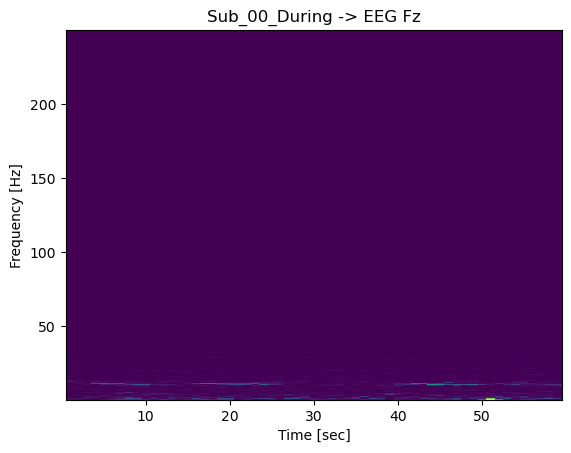

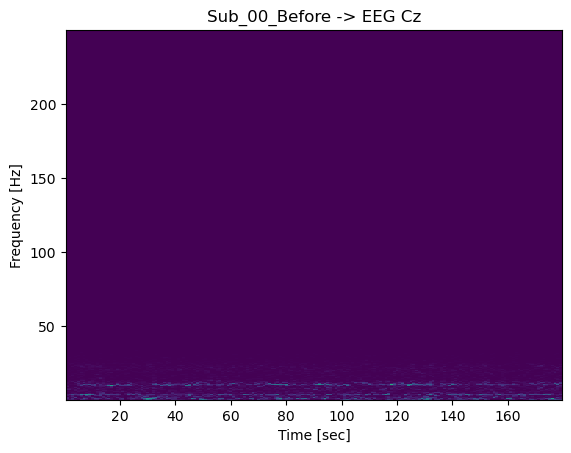

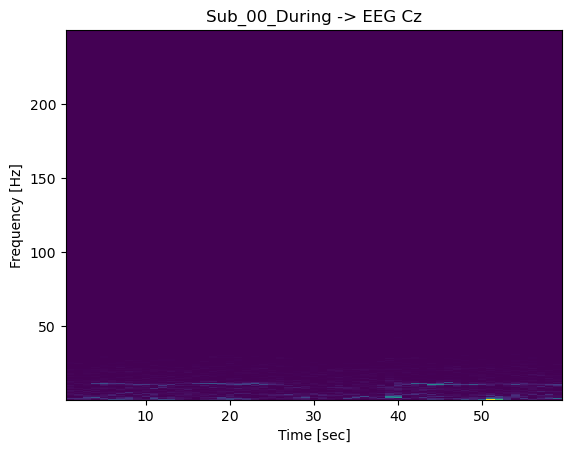

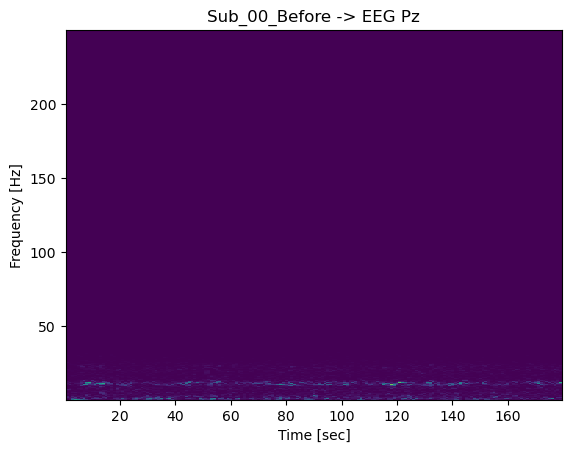

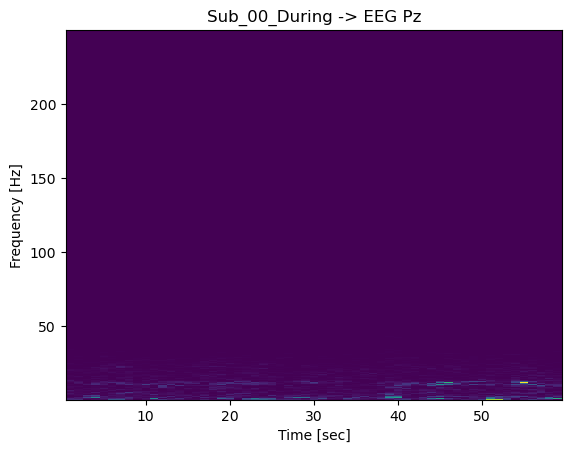

In [8]:
# 1 sec overlap,2 sec frame
#note :  nfft must be greater than or equal to nperseg.

spectogram_resting=[]
spectogram_during=[]

for i in range(1,20):
    #resting
    x=df1[i].T
#   nfft=2500 when fs=500
    freq, time, spectogram = signal.spectrogram(x, fs, window=('tukey', 0.25), nperseg=(fs * 2), noverlap=fs, nfft=(fs*2),return_onesided=True)
    spectogram_resting.append(spectogram)
    plt.pcolormesh(time,fftshift(freq), fftshift(spectogram, axes=0), shading='nearest')#'gouraud')
    title='Sub_00_Before -> '+ ch_names[i-1]
    plt.title(title)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()
    
    #during
    x=df2[i].T
    freq, time, spectogram = signal.spectrogram(x, fs, window=('tukey', 0.25), nperseg=(fs * 2), noverlap=fs, nfft=(fs*2),return_onesided=True)
    spectogram_during.append(spectogram)
    plt.pcolormesh(time,fftshift(freq), fftshift(spectogram, axes=0), shading='nearest')#'gouraud')
    title='Sub_00_During -> ' + ch_names[i-1]
    plt.title(title)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()

In [9]:
spectogram.shape

(501, 59)

## Reading eeg data of all subjects during resting state

In [10]:
data_resting=[]
for i in range(0,36): 
    if(i<10):
        path="C:\\Users\\Riyanka Dey\\Desktop\\Dataset\\EEG_Project\\main data\\Subject0" + str(i) + "_1.csv"
    else:
        path="C:\\Users\\Riyanka Dey\\Desktop\\Dataset\\EEG_Project\\main data\\Subject" + str(i) + "_1.csv"
    df=pd.read_csv(path,sep='\t',header=None)
    df=df.iloc[0:90000,1:20]
    data_resting.append(df)

In [11]:
df.shape

(90000, 19)

## Reading eeg data of all subjects during the mental task

In [12]:
data_during=[]
for i in range(0,36): 
    if(i<10):
        path="C:\\Users\\Riyanka Dey\\Desktop\\Dataset\\EEG_Project\\main data\\Subject0" + str(i) + "_2.csv"
    else:
        path="C:\\Users\\Riyanka Dey\\Desktop\\Dataset\\EEG_Project\\main data\\Subject" + str(i) + "_2.csv"
    df=pd.read_csv(path,sep='\t',header=None)
    df=df.iloc[0:30000,1:20]
    data_during.append(df)

In [13]:
df.shape

(30000, 19)

## Reading subject_info file

In [14]:
subject_info=pd.read_csv("C:\\Users\\Riyanka Dey\\Desktop\\Dataset\\EEG_Project\\main data\\subject-info.csv")
subject_info

,Subject,Age,Gender,Recording year,Number of subtractions,Count quality
0,Subject00,21,F,2011,9.70,0
1,Subject01,18,F,2011,29.35,1
2,Subject02,19,F,2012,12.88,1
3,Subject03,17,F,2010,31.00,1
4,Subject04,17,F,2010,8.60,0
5,Subject05,16,F,2010,20.71,1
6,Subject06,18,M,2011,4.35,0
7,Subject07,18,F,2012,13.38,1
8,Subject08,26,M,2011,18.24,1
9,Subject09,16,F,2010,7.00,0


## Calculate Spectogram for all subjects 

In [15]:
nperseg
noverlap

500

In [16]:
# Resting
fs=500
spect_resting_all=[]  # contains spectogram of all Subjects resting state 

for df in data_resting:
    spect_resting=[]   
    for channel in df.columns:
        x=df[channel].T
        freq, time, spectogram = signal.spectrogram(x, fs, window=('tukey', 0.25), nperseg=(fs * 2), noverlap=fs, nfft=(fs*2) ,return_onesided=True)
        spect_resting.append(spectogram)       
    spect_resting_all.append(spect_resting)

In [17]:
#storing freq & time for futuer use while calculating band feature
rest_freq_arr=freq
rest_time_arr=time

In [18]:
# During

spect_during_all=[] # contains spectogram of all Subjects during mental state 

for df in data_during:
    spect_during=[]
    for channel in df.columns:
        x=df[channel].T
        freq, time, spectogram = signal.spectrogram(x, fs, window=('tukey', 0.25), nperseg=(fs * 2), noverlap=fs, nfft=(fs*2),return_onesided=True)
        spect_during.append(spectogram)
    spect_during_all.append(spect_during)

In [19]:
#storing freq & time for futuer use while calculating band feature
during_freq_arr=freq
during_time_arr=time

In [20]:
during_freq_arr

array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,
        13.5,  14. ,  14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,
        18. ,  18.5,  19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,
        22.5,  23. ,  23.5,  24. ,  24.5,  25. ,  25.5,  26. ,  26.5,
        27. ,  27.5,  28. ,  28.5,  29. ,  29.5,  30. ,  30.5,  31. ,
        31.5,  32. ,  32.5,  33. ,  33.5,  34. ,  34.5,  35. ,  35.5,
        36. ,  36.5,  37. ,  37.5,  38. ,  38.5,  39. ,  39.5,  40. ,
        40.5,  41. ,  41.5,  42. ,  42.5,  43. ,  43.5,  44. ,  44.5,
        45. ,  45.5,  46. ,  46.5,  47. ,  47.5,  48. ,  48.5,  49. ,
        49.5,  50. ,  50.5,  51. ,  51.5,  52. ,  52.5,  53. ,  53.5,
        54. ,  54.5,  55. ,  55.5,  56. ,  56.5,  57. ,  57.5,  58. ,
        58.5,  59. ,  59.5,  60. ,  60.5,  61. ,  61.5,  62. ,  62.5,
        63. ,  63.5,

## Creating column names for final dataframes

In [21]:
col_names=[]
band_name=['delta_mean','delta_std','theta_mean','theta_std','alpha_mean','alpha_std','beta_mean','beta_std']

for ch in ch_names:
    for j in band_name:
        name=ch + '_' + j
        col_names.append(name)

In [22]:
len(col_names)
#col_names

152

In [23]:
len(spect_during_all[0][0][0])

59

## Frequency Band Calculation of spectogram for all Subjects

In [24]:
len(spect_resting_all)

36

In [25]:
#one subject's spectogram
len(spect_resting_all[0])

19

In [26]:
#subject_00's channel-1
(spect_during_all[0][0].shape)

(501, 59)

In [27]:
#subject_00 -> channel-1 -> frequency 0 Hz
spect_resting_all[0][0][0].shape

(179,)

### Frequency Bands

In [28]:
delta_band = (0.5, 4)
theta_band = (4, 8)
alpha_band = (8, 12)
beta_band = (12, 30)

### Resting state

In [29]:
rest_freq_arr

array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,
        13.5,  14. ,  14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,
        18. ,  18.5,  19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,
        22.5,  23. ,  23.5,  24. ,  24.5,  25. ,  25.5,  26. ,  26.5,
        27. ,  27.5,  28. ,  28.5,  29. ,  29.5,  30. ,  30.5,  31. ,
        31.5,  32. ,  32.5,  33. ,  33.5,  34. ,  34.5,  35. ,  35.5,
        36. ,  36.5,  37. ,  37.5,  38. ,  38.5,  39. ,  39.5,  40. ,
        40.5,  41. ,  41.5,  42. ,  42.5,  43. ,  43.5,  44. ,  44.5,
        45. ,  45.5,  46. ,  46.5,  47. ,  47.5,  48. ,  48.5,  49. ,
        49.5,  50. ,  50.5,  51. ,  51.5,  52. ,  52.5,  53. ,  53.5,
        54. ,  54.5,  55. ,  55.5,  56. ,  56.5,  57. ,  57.5,  58. ,
        58.5,  59. ,  59.5,  60. ,  60.5,  61. ,  61.5,  62. ,  62.5,
        63. ,  63.5,

In [30]:
# Define frequency bands (in Hz)
feature_bands_resting=[]
for spect_sub in spect_resting_all:
    feature=[]
    for spect_ch in spect_sub:
        # Extract frequency bands from spectrogram
        delta_power = spect_ch[(rest_freq_arr >= delta_band[0]) & (rest_freq_arr <= delta_band[1])]
        theta_power = spect_ch[(rest_freq_arr >= theta_band[0]) & (rest_freq_arr <= theta_band[1])]
        alpha_power = spect_ch[(rest_freq_arr >= alpha_band[0]) & (rest_freq_arr <= alpha_band[1])]
        beta_power = spect_ch[(rest_freq_arr >= beta_band[0]) & (rest_freq_arr <= beta_band[1])]

        #mean
        delta_mean = np.mean(np.log(delta_power))
        theta_mean = np.mean(np.log(theta_power))
        alpha_mean = np.mean(np.log(alpha_power))
        beta_mean = np.mean(np.log(beta_power))
        
        #std
        delta_std = np.std(np.log(delta_power))
        theta_std = np.std(np.log(theta_power))
        alpha_std = np.std(np.log(alpha_power))
        beta_std = np.std(np.log(beta_power))
        
        feature.append(delta_mean)
        feature.append(delta_std)
        
        feature.append(theta_mean)
        feature.append(theta_std)
        
        feature.append(alpha_mean)
        feature.append(alpha_std)
        
        feature.append(beta_mean)
        feature.append(beta_std)
        
    feature_bands_resting.append(feature)

In [31]:
delta_power.shape
len(feature_bands_resting[0])

152

In [32]:
np.log(delta_power)

array([[15.42855392, 14.33473607, 13.35250772, ..., 12.75844119,
        14.00619097, 15.37524384],
       [14.68061475, 16.1197279 , 15.66559907, ..., 13.29455996,
        13.40020492, 15.79014474],
       [16.09096538, 15.8044999 , 16.31445242, ..., 14.55116773,
        15.78518911, 15.01151207],
       ...,
       [10.20868673, 13.85037389, 13.74575107, ..., 13.88065737,
        13.90437157, 14.06817205],
       [11.34422285, 13.3966545 , 11.72842979, ..., 10.59113668,
        12.44754745, 13.18308049],
       [11.75593359, 12.12100126, 14.68168523, ..., 11.19318748,
        11.71078251, 13.06272173]])

In [33]:
spect_ch.shape

(501, 179)

### During Mental task

In [34]:
# Define frequency bands (in Hz)
feature_bands_during=[]
for spect_sub in spect_during_all:
    feature=[]
    for spect_ch in spect_sub:
        # Extract frequency bands from spectrogram
        delta_power = spect_ch[(during_freq_arr >= delta_band[0]) & (during_freq_arr <= delta_band[1])]
        theta_power = spect_ch[(during_freq_arr >= theta_band[0]) & (during_freq_arr <= theta_band[1])]
        alpha_power = spect_ch[(during_freq_arr >= alpha_band[0]) & (during_freq_arr <= alpha_band[1])]
        beta_power = spect_ch[(during_freq_arr >= beta_band[0]) & (during_freq_arr <= beta_band[1])]
        
        #mean
        delta_mean = np.mean(np.log(delta_power))
        theta_mean = np.mean(np.log(theta_power))
        alpha_mean = np.mean(np.log(alpha_power))
        beta_mean = np.mean(np.log(beta_power))
      
        #std
        delta_std = np.std(np.log(delta_power))
        theta_std = np.std(np.log(theta_power))
        alpha_std = np.std(np.log(alpha_power))
        beta_std = np.std(np.log(beta_power))
        
        feature.append(delta_mean)
        feature.append(delta_std)
        
        feature.append(theta_mean)
        feature.append(theta_std)
        
        feature.append(alpha_mean)
        feature.append(alpha_std)
        
        feature.append(beta_mean)
        feature.append(beta_std)
        
    feature_bands_during.append(feature)

In [35]:
feature_bands_during

[[14.454221787956902,
  1.5906404446615612,
  12.72210372540913,
  1.2962238567522377,
  13.005921856156139,
  1.494736935857083,
  11.434798048390547,
  1.4181336358005852,
  14.276099658738296,
  1.5427159294247716,
  12.9311058796805,
  1.254624907197254,
  13.561865115025931,
  1.5020437173301457,
  11.841300588547405,
  1.378608184941922,
  14.859493731819331,
  1.467527054294498,
  13.506238430238618,
  1.2154083192260667,
  13.967211111339743,
  1.5383231109144524,
  12.22415846611937,
  1.4313552977589665,
  14.938971951149492,
  1.4047020818167266,
  13.754868171929461,
  1.3038785716009609,
  14.257582608587006,
  1.505584240978195,
  12.411906622769521,
  1.469703282279544,
  14.675795402441056,
  1.6192999809854305,
  13.161545121265474,
  1.235738757737409,
  13.497296765482256,
  1.5642691263528896,
  12.114674918042871,
  1.376972931571052,
  14.725061577127644,
  1.5262234428665675,
  13.176210547292344,
  1.453874803300961,
  13.796730346866111,
  1.501364865659039,
  

In [36]:
# spect_ch[(rest_freq_arr >= delta_band[0]) & (rest_freq_arr <= delta_band[1])][7]
len(feature_bands_resting[0])

152

In [37]:
#gamma_power


In [38]:
spectogram.shape

(501, 59)

In [39]:
feature_bands_resting=pd.DataFrame(feature_bands_resting,columns=col_names)
feature_bands_during=pd.DataFrame(feature_bands_during,columns=col_names)

#to get accurate during state band feature
new_feat_band=feature_bands_during-feature_bands_resting #resting state is substracted

In [40]:
new_feat_band #everything will be on this data for during

,EEG Fp1_delta_mean,EEG Fp1_delta_std,EEG Fp1_theta_mean,EEG Fp1_theta_std,EEG Fp1_alpha_mean,EEG Fp1_alpha_std,EEG Fp1_beta_mean,EEG Fp1_beta_std,EEG Fp2_delta_mean,EEG Fp2_delta_std,...,EEG Cz_beta_mean,EEG Cz_beta_std,EEG Pz_delta_mean,EEG Pz_delta_std,EEG Pz_theta_mean,EEG Pz_theta_std,EEG Pz_alpha_mean,EEG Pz_alpha_std,EEG Pz_beta_mean,EEG Pz_beta_std
0,0.375452,0.217423,-0.410071,-0.015954,-0.982428,-0.030609,-0.423831,-0.068312,0.047979,0.064692,...,-0.598094,-0.023017,0.103433,-0.046573,0.080635,-0.015180,-0.495066,-0.069200,-0.034078,-0.100847
1,0.677689,0.127434,0.270778,0.089445,-0.366984,-0.019648,-0.641768,-0.043859,0.498023,-0.042152,...,-0.285839,-0.047618,0.835385,0.127825,0.470528,-0.042588,0.306683,-0.000261,0.892117,-0.147922
2,1.069797,-0.159583,0.824046,0.004507,0.480329,0.049034,0.595956,0.039833,1.467252,-0.039385,...,1.895714,-0.008539,1.504491,-0.083109,1.420235,-0.052343,1.688421,-0.191768,1.780790,0.039261
3,0.922450,0.001677,0.534204,-0.015422,-0.078844,-0.128753,0.516206,-0.031750,-0.864425,0.221508,...,0.505613,0.013222,1.518908,-0.137396,1.170190,0.006756,0.440105,-0.144164,0.659071,0.022802
4,1.041454,-0.303347,1.516951,-0.280279,1.664439,-0.104137,1.556379,-0.103547,0.606362,-0.018186,...,0.483112,0.079990,0.635820,0.028689,0.812641,-0.169227,0.628393,-0.158076,1.052085,0.016613
5,0.270416,-0.145717,-0.096333,0.035098,-0.611844,-0.077743,-0.122146,-0.018403,1.147173,0.061327,...,0.572015,0.001462,0.483065,0.069248,0.254267,-0.113279,-0.159211,-0.078155,0.218812,-0.025658
6,-0.131888,0.262348,-0.911123,-0.041105,-0.944341,-0.014431,-0.706325,-0.071274,0.522774,0.057123,...,-0.144851,-0.122154,-0.031148,0.006586,0.083331,-0.048867,-0.304225,-0.034170,0.403616,-0.134553
7,-0.095082,0.201429,-0.238576,-0.100572,-0.854019,-0.098163,-0.810273,-0.034871,0.673419,0.014150,...,0.343247,-0.069125,0.255323,0.115481,0.152797,-0.282983,0.125677,-0.344125,0.355680,-0.093994
8,-0.024876,0.048437,-0.321285,-0.008701,-1.196443,-0.163442,-0.986720,-0.022726,0.394874,0.230473,...,-0.097615,-0.003849,1.139411,-0.187791,1.323867,-0.135377,0.257394,-0.176830,1.157983,-0.086775
9,0.679252,0.032540,-0.087939,-0.000321,-0.622777,-0.154997,-0.124760,-0.033111,0.659910,-0.060395,...,0.682614,-0.047877,0.687761,-0.029009,0.446554,-0.093667,-0.054872,0.108174,0.650297,-0.004493


## Storing the features dataframe into csv file

In [41]:
#saving feature as csv
feature_bands_resting.to_csv('feature_bands_resting.csv',index=False)

In [42]:
#saving feature as csv
feature_bands_during.to_csv('feature_bands_during.csv',index=False)

## Resting - During Classification

In [43]:
channel=['EEG O1','EEG O2','EEG P4','EEG P3','EEG F7','EEG F8','EEG F3','EEG F4']
col=[]
band_name=['delta_mean','delta_std','theta_mean','theta_std','alpha_mean','alpha_std','beta_mean','beta_std']

for ch in channel:
    for j in band_name:
        name=ch + '_' + j
        col.append(name)

In [44]:
#feature_bands_during
#col

In [45]:
#rest->0  during->1
feature_bands_resting['state']=[0]*36
feature_bands_during['state']=[1]*36

In [46]:
final_dataframe=pd.concat([feature_bands_during,feature_bands_resting],axis=0)

In [47]:
final_dataframe.to_csv('final_dataframe.csv',index=False)

## Classes to classify

In [48]:
#class
rest_good=1
rest_bad=2
during_good=3
during_bad=4

## Local binary pattern

In [49]:
type(spect_during_all[0][0][0])

numpy.ndarray

In [50]:
#LBP function
def LBP(mat):

    # Define LBP parameters
    radius = 1
    n_points = 8
    lbp_codes=[]

    for i in range(radius, mat.shape[0] - radius):
        for j in range(radius, mat.shape[1] - radius):

            center = mat[i][j] #middle point
        
            # generate binary code
            binary_code = ""

            #1st row -------
            for k in range(j-radius,j+radius+1):
                if(mat[i-radius][k] >= center):
                    binary_code += "1"
                else:
                    binary_code += "0"

            #right side |
            if(mat[i][j+radius] >= center):
                binary_code += "1"
            else:
                binary_code += "0"

            #bottom
            for k in range(j+radius,j-radius-1,-1):
                if(mat[i+radius][k] >= center):
                    binary_code += "1"
                else:
                    binary_code += "0"
            #left
            if(mat[i][j-radius] >= center):
                binary_code += "1"
            else:
                binary_code += "0"

            # Convert binary code to decimal
            lbp_value = int(binary_code, 2)
            #print(lbp_value)

            lbp_codes.append(lbp_value)

    return lbp_codes
            

In [51]:
all_histograms = []

for person_data in spect_during_all:  
    person_histograms = []
    for channel_data in person_data:  
        
        lbp_features = LBP(channel_data)  
        hist, _ = np.histogram(lbp_features, bins=256, range=(0, 256)) 
        # normalizing each hist by dividing each element by max element i.e. 255
        new_hist=[a/255 for a in hist]
        person_histograms.append(new_hist)
      
    all_histograms.append(np.concatenate(person_histograms)) #scaled data

In [52]:
len(all_histograms)

36

In [53]:
#lbp_features
y=[[7,8],[1,1]]
t=0
for p in y:
    t+=sum(p)
t
np.concatenate(y)

array([7, 8, 1, 1])

In [54]:
len(person_histograms)
#len(new_hist)
#sum(person_histograms[0])

19

In [55]:
256*19 #bins*channel

4864

In [56]:
len(all_histograms[0])

4864

## Calculating Features by histograms

In [57]:
# histogram_feature_matrix = np.array(histogram_feature_dis)
# histogram_feature_matrix

In [58]:
# histogram_dis=pd.DataFrame(histogram_feature_dis)
# histogram_dis

## resting - during classification dataset

In [59]:
final_dataframe

,EEG Fp1_delta_mean,EEG Fp1_delta_std,EEG Fp1_theta_mean,EEG Fp1_theta_std,EEG Fp1_alpha_mean,EEG Fp1_alpha_std,EEG Fp1_beta_mean,EEG Fp1_beta_std,EEG Fp2_delta_mean,EEG Fp2_delta_std,...,EEG Cz_beta_std,EEG Pz_delta_mean,EEG Pz_delta_std,EEG Pz_theta_mean,EEG Pz_theta_std,EEG Pz_alpha_mean,EEG Pz_alpha_std,EEG Pz_beta_mean,EEG Pz_beta_std,state
0,14.454222,1.590640,12.722104,1.296224,13.005922,1.494737,11.434798,1.418134,14.276100,1.542716,...,1.469175,14.733091,1.297678,13.679798,1.291330,13.914345,1.519967,12.349645,1.496305,1
1,14.852940,1.699855,13.875320,1.439098,13.178718,1.346398,11.371640,1.474057,14.518552,1.576935,...,1.525761,13.791005,1.739735,12.082567,1.338674,12.050869,1.406566,10.817450,1.502786,1
2,14.457023,1.351081,13.208146,1.317401,13.358255,1.465411,13.200368,1.411397,14.935968,1.486059,...,1.524086,15.225468,1.425560,13.701988,1.250551,14.676456,1.275601,12.590895,1.670032,1
3,15.231531,1.670629,13.387656,1.327651,13.127324,1.321928,11.599081,1.386964,13.412702,1.803678,...,1.569047,15.505061,1.274192,14.766860,1.296910,14.811914,1.477592,11.862092,1.589299,1
4,15.396374,1.322334,14.699819,1.232296,14.268112,1.393933,12.690864,1.567372,15.261275,1.640091,...,1.687538,14.700659,1.599362,13.674713,1.317383,13.865523,1.560317,12.150547,1.690675,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,15.181615,1.655838,13.264753,1.341751,13.222644,1.554973,11.690671,1.353773,15.478713,1.725247,...,1.417017,15.033549,1.532119,13.726390,1.303112,13.958813,1.497000,11.748447,1.434167,0
32,15.122493,1.369375,14.274046,1.304492,14.658371,1.507827,12.187379,1.407200,15.257387,1.359226,...,1.447706,14.519121,1.364190,14.137842,1.377940,14.544799,1.607529,11.961263,1.460286,0
33,14.724405,1.428367,13.540235,1.313205,13.619388,1.322896,11.286653,1.447389,15.208688,1.405971,...,1.502848,14.532091,1.363497,13.638943,1.311602,14.824864,1.559866,11.785941,1.725703,0
34,14.639486,1.561772,13.600341,1.257077,14.035469,1.367181,11.946848,1.484024,14.307184,1.538272,...,1.564084,14.656325,1.508020,13.453431,1.338650,14.302463,1.481880,11.737776,1.639557,0


In [60]:
# + 1 ->state column
8*19

152

In [61]:
# col=[]
# #ch_names=['EEG Fp1','EEG Fp2','EEG F3','EEG F4','EEG F7','EEG F8','EEG T3','EEG T4','EEG C3','EEG C4','EEG T5','EEG T6','EEG P3','EEG P4','EEG O1','EEG O2','EEG Fz','EEG Cz','EEG Pz']#,'EEG A2-A1','ECG ECG','EDF Annotations']
# #ch=[18,17]
# # for i in ch:
# #     for band in band_name:
# #         c=ch_names[i]+'_'+band
# #         col.append(c)

# #x=feature_bands_resting.drop(columns=col)
# #x=histogram_feature_matrix
# #x=final_dataframe.drop(columns='state')
# #x=feature_bands_during.drop(columns='state')
# shuffled=final_dataframe.sample(frac=1,random_state=10) #shuffling the dataframe
# x=shuffled[cols]
# #x=feature_bands_during.drop(columns='state')
# x.shape

### x,y for good/bad counter

In [62]:
# x=feature_bands_during.drop(columns='state')
# y=subject_info['Count quality']

### x,y for resting-during classification

In [63]:
# #rest-during classification
# cols=[]
# band_name=['delta_mean','delta_std','theta_mean','theta_std','alpha_mean','alpha_std','beta_mean','beta_std']
# # #channel=['EEG O1','EEG O2','EEG P4','EEG P3','EEG F7','EEG F8','EEG F3','EEG F4']
# channel=['EEG P4','EEG P3','EEG F7','EEG F8','EEG F3','EEG F4']
# for ch in channel:
#     for j in band_name:
#         name=ch + '_' + j
#         cols.append(name)
        

# shuffled=final_dataframe.sample(frac=1,random_state=10) #shuffling the dataframe

# x=shuffled[cols]
# y=shuffled['state'] #resting-during classification

## feature calculate --->> histogram + band 

In [64]:
# histogram_dis + feature_bands_during
#print('shape of \'feature_bands_during\'',feature_bands_during.shape,'\nshape of \'histogram_dis\'',histogram_dis.shape)

In [65]:
# z=range(0,36)
# sns.scatterplot(x[col_names[0]],z,hue=y)
# x[col_names[0]]

In [66]:

# for feat in col_names:
    
#     fig, ax1 = plt.subplots()

#     ax2 = ax1.twinx()
#     sns.scatterplot( x=z,y=x[feat],hue=y, ax=ax1)

#     fig.tight_layout()  


In [67]:
# x[col_names[0]].max()

In [68]:
# x[col_names[0]].min()

## Train-Test-Split

In [69]:
# #spliting data & target
# from sklearn.model_selection import train_test_split

# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)
# #x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)


In [70]:
#scaling data
# from sklearn.preprocessing import StandardScaler

# scaler=StandardScaler()
# x_train_scale=scaler.fit_transform(x_train)
# x_test_scale=scaler.transform(x_test)

## SVM

In [71]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV

# svc=SVC()
# hyperparameters = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf', 'sigmoid'],
#     'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7)),
#     'degree': [2, 3, 4]
# }

# #param_svc={'C':[0.001,0.1,1,10],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'gamma':['scale', 'auto']}
# grid_svc=GridSearchCV(svc, hyperparameters, scoring='accuracy', cv=5)

# #training with hyperparameters
# grid_svc.fit(x_train_scale,y_train)

In [72]:
# #best parameter & score for traing data
# best_param=grid_svc.best_params_
# best_score = grid_svc.best_score_

# #creating best svm instance
# best_svm = SVC(**best_param)

# #traing the train data with best parameter
# best_svm.fit(x_train_scale, y_train)

# #evaluate the model on testing data
# accuracy=best_svm.score(x_test_scale,y_test)

In [73]:
# print('Best Parameters : ',best_param)
# print('Training Accuracy : ',best_score)
# print('Testing Accuracy :',accuracy)

## Oversampling

In [74]:
# from imblearn.over_sampling import SMOTE

# # Create an instance of SMOTE
# smote = SMOTE(random_state=42)

# # Perform oversampling using SMOTE
# X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# # X_resampled: Oversampled feature matrix
# # y_resampled: Oversampled target vector

# # Print the count of samples in each class after oversampling
# print("Counts of samples in each class after oversampling: ")
# print(np.bincount(y_resampled))


In [75]:
# x_train_scale=X_resampled
# y_train=y_resampled

In [76]:
# histogram_feature_matrix.shape

In [77]:
# histogram_feature_matrix[0]

In [78]:
# y_train

In [79]:
# print(np.bincount(y_train))

In [80]:
# t=[]
# tt=[]
# n=[9,6,5,2]
# p=[3,4,5,2]
# t.append(n)
# t.append(p)
# tt.append(np.concatenate(t))
# tt

In [81]:
# print(np.bincount(y_test))

In [82]:
list(np.logspace(-3, 3, 7))

[0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

## KNN

In [83]:
# from sklearn.neighbors import KNeighborsClassifier
# knn=KNeighborsClassifier()
# param_knn={'leaf_size':list(range(1,50)),'n_neighbors':range(4,11),'p':[1,2]}
# grid_knn=GridSearchCV(knn,param_knn,cv=5)
# grid_knn.fit(x_train_scale,y_train)

In [84]:
# print('Best Parameters : ',grid_knn.best_params_)
# best_score = grid_knn.best_score_
# h_acc_knn=grid_knn.score(x_test_scale,y_test)
# print('Training Accuracy :',best_score)
# print('Testing Accuracy :',h_acc_knn)

In [85]:
# histogram_feature_matrix.shape

## KNN Implementation

In [86]:
import math
import operator
from numpy.linalg import norm


# Defining a function which calculates euclidean distance between two data points
def euclideanDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
    return np.sqrt(distance)


# ----- for band-feature avg. distance -----
def distance1(data1, data2, length): 
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
    #print(distance)
    return np.sqrt(distance)/length # avg


#------ similarity -> combine all the features data for those tow examples into a single numeric value ------
def distance2(data1, data2, length):
    similarity=0       
    for i in range(length):
        similarity+=min(data1[i],data2[i])  #total sum]
    similarity/=length # dividing each num by its sum 
    dis_similarity=1-similarity
    return dis_similarity


#------for combined feature------
def distance3(data1, data2,hist1,hist2, length1,length2):
    return distance1(data1, data2, length1) + distance2(hist1, hist2, length2)


#-----classification------
#train_dataset : training dataset (x_train)
#train_V : target column for training data (y_train)
#testInstance : test data (one at a time)
#k: no. of k - neighbours
def KNN(train_dataset,train_V, testInstance, k):
 
    distances = []
    sort = []
 
    length = len(testInstance)
    
    # Calculating euclidean distance / cosine similarity between each row of training data and test data
    for x in range(len(train_dataset)):    
        dist = euclideanDistance(testInstance, train_dataset[x], length)
        #dist = cosine_similarity(testInstance, train_data[x]) 
        distances.append((dist,x)) #storing the dist along with its id/index
    
    # Sorting them on the basis of cosine similarity in descending order
    sorted_d = sorted(distances,key=lambda l:l[0])

    #print(sorted_d)
   
    
    good=0
    bad=0
    for i in range(0,k):
        if(train_V[sorted_d[i][1]]):
            good+=1
        else:
            bad+=1
            
    if(good>bad):
        return 1
    else:
        return 0

    
# ------ distance b/w dataset & representative ------
def KNN_rep(train_dataset, representative,distance_func):
    distances = []
    length = len(representative)
    
    # Calculating euclidean distance / cosine similarity between each row of training data and test data
    for x in range(len(train_dataset)):    
        dist = distance_func(train_dataset[x],representative, length)
        distances.append(dist) 
        
    result=pd.DataFrame(distances)
    return result

    
    
# ----- distance b/w all subject of the dataset ------
def knn_for_distance_matrix(dataset,distance_func):
    all_distances = []   
    # Calculating  distance matrix
    for sub1 in dataset:  
        distance=[]
        for sub2 in dataset:
            dist = distance_func(sub1,sub2,len(sub1))
            distance.append(dist) #storing the dist along with its id/index
        all_distances.append(distance)
    
    result=pd.DataFrame(all_distances)
    
    return result



## 1.Only using band-features

In [87]:
dataset=new_feat_band # feature after subtracting resting val from during val
dataset=dataset.to_numpy()
band_feature_dataset=knn_for_distance_matrix(dataset,distance1)
#band_feature_dataset

In [88]:
dataset

array([[ 3.75451697e-01,  2.17423078e-01, -4.10070822e-01, ...,
        -6.92001184e-02, -3.40776646e-02, -1.00846670e-01],
       [ 6.77689077e-01,  1.27433692e-01,  2.70778490e-01, ...,
        -2.61409882e-04,  8.92117070e-01, -1.47921819e-01],
       [ 1.06979670e+00, -1.59583492e-01,  8.24046050e-01, ...,
        -1.91768419e-01,  1.78078961e+00,  3.92611193e-02],
       ...,
       [ 6.83252461e-01,  1.10574938e-01,  5.65174380e-01, ...,
        -2.71013925e-01,  1.87061828e-01, -2.16928195e-01],
       [ 8.20343135e-01, -1.06527564e-02,  2.51232468e-01, ...,
        -1.23208835e-01,  7.31004722e-01, -5.77190820e-02],
       [ 4.27188727e-01,  1.87802488e-01,  3.70883928e-01, ...,
         1.54953760e-02,  7.60683994e-01, -1.11185112e-01]])

## 2.Only using Histogram-features 

In [89]:
dataset=all_histograms
histogram_feature_dataset=knn_for_distance_matrix(dataset,distance2)
#histogram_feature_dataset

## 3.Band-feature + Histogram

In [90]:
hist_band_dataset=histogram_feature_dataset+band_feature_dataset
#hist_band_dataset

In [91]:
#band_feature_dataset

In [92]:
# train=[[7,0,7,0],[1,2,4,7],[2,4,6,1],[17,10,7,0],[11,5,4,1],[2,2,3,1]]
# train_V=[0,1,0,0,1,0]
# test=[6,5,8,3]
# KNN(train,train_V,test,3)

In [93]:
# train_dataset

In [94]:
# train_dataset=x_train_scale
# train_V=y_train
# train_V=y_train.to_numpy() # y_train is a pandas series(kind of map->mapping with key as index)-> so we need to change it to numpy array
# train_V
# testing=y_test.to_numpy() # same as above

In [95]:
# res=[]
# for test in x_test_scale:
#     res.append(KNN(train_dataset,train_V,test,5))

In [96]:
# x_test_scale[0].shape

In [97]:
# from sklearn.metrics import accuracy_score

# #calculate balanced accuracy score
# # accuracy_score(actual, pred)
# accuracy_score(testing,res)


## separating the bad & good counters

In [98]:
good_sub=[]
bad_sub=[]
for i in range(len(subject_info)):
    if(subject_info['Count quality'][i]==1):
        good_sub.append(i)
    else:
        bad_sub.append(i)

In [99]:
good_sub

[1,
 2,
 3,
 5,
 7,
 8,
 11,
 12,
 13,
 15,
 16,
 17,
 18,
 20,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 34,
 35]

In [100]:
bad_sub

[0, 4, 6, 9, 10, 14, 19, 21, 22, 30]

In [101]:
# datasets are:-
# band_feature_dataset
# histogram_feature_dataset
# hist_band_dataset

In [102]:
band_feature_dataset[bad_sub]

,0,4,6,9,10,14,19,21,22,30
0,0.000000,0.073337,0.031247,0.050087,0.069118,0.053750,0.050110,0.033855,0.045199,0.035345
1,0.058327,0.089831,0.064163,0.074491,0.094156,0.066447,0.071245,0.059835,0.068139,0.056450
2,0.090363,0.047358,0.082714,0.060356,0.055557,0.091377,0.074596,0.073966,0.086816,0.093219
3,0.055660,0.076302,0.059159,0.063064,0.084620,0.064193,0.062370,0.052114,0.063210,0.059401
4,0.073337,0.000000,0.068684,0.046708,0.062337,0.067773,0.066615,0.056571,0.073246,0.074958
5,0.027848,0.063406,0.035162,0.045931,0.063342,0.051037,0.049122,0.029959,0.043028,0.033907
6,0.031247,0.068684,0.000000,0.047016,0.069224,0.054570,0.048776,0.029218,0.053385,0.044978
7,0.036229,0.073507,0.037826,0.053404,0.073951,0.057271,0.052628,0.034716,0.051064,0.038966
8,0.032083,0.065947,0.038349,0.043531,0.071831,0.045125,0.044717,0.037359,0.041738,0.042498
9,0.050087,0.046708,0.047016,0.000000,0.062554,0.051058,0.049311,0.038660,0.051928,0.055853


In [103]:
histogram_feature_dataset[bad_sub]

,0,4,6,9,10,14,19,21,22,30
0,0.564292,0.585097,0.585313,0.584996,0.584123,0.584639,0.585639,0.584594,0.584024,0.585140
1,0.586394,0.587527,0.586634,0.585829,0.586742,0.585677,0.587385,0.587722,0.586337,0.587467
2,0.585172,0.584773,0.586170,0.585018,0.585225,0.585367,0.584265,0.585122,0.585804,0.584795
3,0.584509,0.585376,0.585105,0.585572,0.583934,0.585255,0.585491,0.584592,0.584098,0.585035
4,0.585097,0.564292,0.585512,0.585745,0.584423,0.585409,0.584890,0.584779,0.584658,0.583992
5,0.584835,0.585759,0.584668,0.584770,0.584846,0.585001,0.586079,0.585527,0.584939,0.585677
6,0.585313,0.585512,0.564292,0.585252,0.585170,0.584355,0.586008,0.585422,0.584675,0.585326
7,0.585168,0.584881,0.585979,0.584819,0.585287,0.584762,0.584616,0.585132,0.585979,0.584714
8,0.584685,0.584722,0.585369,0.585612,0.583842,0.585248,0.585531,0.584115,0.584072,0.584994
9,0.584996,0.585745,0.585252,0.564292,0.585542,0.584661,0.585250,0.585749,0.585728,0.585423


In [104]:
hist_band_dataset[bad_sub]#.sum(axis=0)[4]

,0,4,6,9,10,14,19,21,22,30
0,0.564292,0.658434,0.616559,0.635083,0.653241,0.638389,0.635749,0.618449,0.629224,0.620485
1,0.644721,0.677358,0.650797,0.660320,0.680899,0.652124,0.658629,0.647557,0.654476,0.643917
2,0.675536,0.632132,0.668884,0.645374,0.640782,0.676745,0.658861,0.659088,0.672619,0.678014
3,0.640169,0.661678,0.644265,0.648636,0.668554,0.649447,0.647861,0.636706,0.647308,0.644436
4,0.658434,0.564292,0.654196,0.632453,0.646761,0.653181,0.651505,0.641350,0.657904,0.658950
5,0.612683,0.649164,0.619830,0.630701,0.648188,0.636037,0.635201,0.615486,0.627967,0.619584
6,0.616559,0.654196,0.564292,0.632268,0.654394,0.638925,0.634785,0.614641,0.638060,0.630304
7,0.621398,0.658389,0.623805,0.638223,0.659238,0.642033,0.637244,0.619849,0.637042,0.623681
8,0.616768,0.650669,0.623718,0.629143,0.655673,0.630374,0.630248,0.621474,0.625810,0.627492
9,0.635083,0.632453,0.632268,0.564292,0.648096,0.635719,0.634561,0.624409,0.637656,0.641276


In [105]:
#new_feat_band
#all_histograms

In [106]:
len(all_histograms[0])

4864

## Finding the average good counters feature & bad counters feature

In [107]:
#coverting to array as it would be easier to separate good & bad counters
new_hist=np.array(all_histograms)
new_feat=np.array(new_feat_band)

In [108]:
# work on this:
#new_feat
#new_hist

In [109]:
# collecting only good counter's features
band_feat_good=[]
hist_feat_good=[]
for i in good_sub:
    band_feat_good.append(new_feat[i])
    hist_feat_good.append(new_hist[i])

In [110]:
# collecting only bad counter's features
band_feat_bad=[]
hist_feat_bad=[]
for i in bad_sub:
    band_feat_bad.append(new_feat[i])
    hist_feat_bad.append(new_hist[i])

In [111]:
#forming a df for good & bad --- as it would help in calulating mean of each feature (i.e. column wise avg.)

band_feat_good_df=pd.DataFrame(band_feat_good)
band_feat_bad_df=pd.DataFrame(band_feat_bad)

hist_feat_good_df=pd.DataFrame(hist_feat_good)
hist_feat_bad_df=pd.DataFrame(hist_feat_bad)

In [112]:
#finding mean of each features & converting it to a numpy array(before it was in series form)

#band feature
band_good_representative=band_feat_good_df.mean(axis=0).to_numpy() # axis=0 means column wise 
band_bad_representative=band_feat_bad_df.mean(axis=0).to_numpy()

#histogram feature
hist_good_representative=hist_feat_good_df.mean(axis=0).to_numpy()
hist_bad_representative=hist_feat_bad_df.mean(axis=0).to_numpy()

In [113]:
hist_bad_representative

array([ 9.76117647,  2.14117647,  1.64078431, ...,  1.61607843,
        1.63686275, 11.64509804])

In [114]:
new_feat_band

,EEG Fp1_delta_mean,EEG Fp1_delta_std,EEG Fp1_theta_mean,EEG Fp1_theta_std,EEG Fp1_alpha_mean,EEG Fp1_alpha_std,EEG Fp1_beta_mean,EEG Fp1_beta_std,EEG Fp2_delta_mean,EEG Fp2_delta_std,...,EEG Cz_beta_mean,EEG Cz_beta_std,EEG Pz_delta_mean,EEG Pz_delta_std,EEG Pz_theta_mean,EEG Pz_theta_std,EEG Pz_alpha_mean,EEG Pz_alpha_std,EEG Pz_beta_mean,EEG Pz_beta_std
0,0.375452,0.217423,-0.410071,-0.015954,-0.982428,-0.030609,-0.423831,-0.068312,0.047979,0.064692,...,-0.598094,-0.023017,0.103433,-0.046573,0.080635,-0.015180,-0.495066,-0.069200,-0.034078,-0.100847
1,0.677689,0.127434,0.270778,0.089445,-0.366984,-0.019648,-0.641768,-0.043859,0.498023,-0.042152,...,-0.285839,-0.047618,0.835385,0.127825,0.470528,-0.042588,0.306683,-0.000261,0.892117,-0.147922
2,1.069797,-0.159583,0.824046,0.004507,0.480329,0.049034,0.595956,0.039833,1.467252,-0.039385,...,1.895714,-0.008539,1.504491,-0.083109,1.420235,-0.052343,1.688421,-0.191768,1.780790,0.039261
3,0.922450,0.001677,0.534204,-0.015422,-0.078844,-0.128753,0.516206,-0.031750,-0.864425,0.221508,...,0.505613,0.013222,1.518908,-0.137396,1.170190,0.006756,0.440105,-0.144164,0.659071,0.022802
4,1.041454,-0.303347,1.516951,-0.280279,1.664439,-0.104137,1.556379,-0.103547,0.606362,-0.018186,...,0.483112,0.079990,0.635820,0.028689,0.812641,-0.169227,0.628393,-0.158076,1.052085,0.016613
5,0.270416,-0.145717,-0.096333,0.035098,-0.611844,-0.077743,-0.122146,-0.018403,1.147173,0.061327,...,0.572015,0.001462,0.483065,0.069248,0.254267,-0.113279,-0.159211,-0.078155,0.218812,-0.025658
6,-0.131888,0.262348,-0.911123,-0.041105,-0.944341,-0.014431,-0.706325,-0.071274,0.522774,0.057123,...,-0.144851,-0.122154,-0.031148,0.006586,0.083331,-0.048867,-0.304225,-0.034170,0.403616,-0.134553
7,-0.095082,0.201429,-0.238576,-0.100572,-0.854019,-0.098163,-0.810273,-0.034871,0.673419,0.014150,...,0.343247,-0.069125,0.255323,0.115481,0.152797,-0.282983,0.125677,-0.344125,0.355680,-0.093994
8,-0.024876,0.048437,-0.321285,-0.008701,-1.196443,-0.163442,-0.986720,-0.022726,0.394874,0.230473,...,-0.097615,-0.003849,1.139411,-0.187791,1.323867,-0.135377,0.257394,-0.176830,1.157983,-0.086775
9,0.679252,0.032540,-0.087939,-0.000321,-0.622777,-0.154997,-0.124760,-0.033111,0.659910,-0.060395,...,0.682614,-0.047877,0.687761,-0.029009,0.446554,-0.093667,-0.054872,0.108174,0.650297,-0.004493


## Using Band features Only

In [115]:
#finding distance of each subject from good_representative
band_good=KNN_rep(np.array(new_feat_band),band_good_representative,distance1).to_numpy()
band_good

array([[0.02526716],
       [0.05584269],
       [0.07611994],
       [0.04564073],
       [0.06036932],
       [0.02083572],
       [0.0276989 ],
       [0.03023496],
       [0.02824779],
       [0.04097738],
       [0.06064427],
       [0.03859026],
       [0.04818736],
       [0.03815516],
       [0.05011922],
       [0.02999861],
       [0.02948908],
       [0.02481026],
       [0.02723249],
       [0.03713201],
       [0.05026867],
       [0.02044194],
       [0.04250333],
       [0.02864428],
       [0.03254768],
       [0.04540354],
       [0.05450853],
       [0.04748069],
       [0.02247549],
       [0.02076958],
       [0.03518369],
       [0.06499987],
       [0.03052617],
       [0.02176989],
       [0.01966321],
       [0.03994325]])

In [116]:
#finding distance of each subject from bad_representative
band_bad=KNN_rep(np.array(new_feat_band),band_bad_representative,distance1).to_numpy()
band_bad

array([[0.02946246],
       [0.06008752],
       [0.06692749],
       [0.05197047],
       [0.04957752],
       [0.02504317],
       [0.02996877],
       [0.03612398],
       [0.02843352],
       [0.02892111],
       [0.05556287],
       [0.03705412],
       [0.04444147],
       [0.03589563],
       [0.0447751 ],
       [0.03459444],
       [0.0393956 ],
       [0.02731994],
       [0.03337808],
       [0.03724538],
       [0.04629669],
       [0.02237367],
       [0.03822091],
       [0.03678649],
       [0.04188158],
       [0.05617596],
       [0.06107503],
       [0.05592256],
       [0.02496148],
       [0.02517271],
       [0.03602116],
       [0.07738488],
       [0.03924636],
       [0.0254017 ],
       [0.02396894],
       [0.03784195]])

In [117]:
y_pred=[]
for i in range(36):
    if(band_good[i]<=band_bad[i]): # nearer to good representative
        y_pred.append(1) #so count it as good
    else:  # nearer to bad representative
        y_pred.append(0) #so count it as bad

In [118]:
from sklearn.metrics import accuracy_score

#calculate balanced accuracy score
# accuracy_score(actual, pred)
accuracy_score(subject_info['Count quality'],y_pred)

0.6944444444444444

In [119]:
# subject_info['Count quality']

In [120]:
# y_pred

## Using histogram features

In [121]:
#finding distance of each subject from good_representative
hist_good=KNN_rep(np.array(all_histograms),hist_good_representative,distance2).to_numpy()
hist_good

array([[0.57896774],
       [0.58000702],
       [0.57911758],
       [0.57868416],
       [0.57967063],
       [0.5786231 ],
       [0.5795852 ],
       [0.57900936],
       [0.5789986 ],
       [0.57909435],
       [0.57931883],
       [0.5793067 ],
       [0.57951931],
       [0.57874463],
       [0.57901336],
       [0.57893552],
       [0.58349164],
       [0.57885174],
       [0.57921619],
       [0.57989278],
       [0.57905748],
       [0.57962353],
       [0.57915172],
       [0.57866494],
       [0.57863811],
       [0.57847854],
       [0.57824482],
       [0.58031277],
       [0.57848409],
       [0.57916732],
       [0.57971017],
       [0.58235719],
       [0.57947915],
       [0.57891165],
       [0.57850545],
       [0.58211091]])

In [122]:
#finding distance of each subject from good_representative
hist_bad=KNN_rep(np.array(all_histograms),hist_bad_representative,distance2).to_numpy()
hist_bad

array([[0.57785297],
       [0.58183412],
       [0.57984206],
       [0.57948723],
       [0.57814895],
       [0.57992566],
       [0.57834857],
       [0.57982545],
       [0.57940225],
       [0.57859149],
       [0.57797391],
       [0.58077133],
       [0.57994969],
       [0.57928244],
       [0.57815072],
       [0.57937935],
       [0.58538861],
       [0.57933703],
       [0.57970459],
       [0.5788224 ],
       [0.57962179],
       [0.57820192],
       [0.57808308],
       [0.57909636],
       [0.57987221],
       [0.57935468],
       [0.57903396],
       [0.58197505],
       [0.57909564],
       [0.57976748],
       [0.57816991],
       [0.58408217],
       [0.58089864],
       [0.57953963],
       [0.57899889],
       [0.58374774]])

In [123]:
y_pred=[]
for i in range(36):
    if(hist_good[i]<=hist_bad[i]): # nearer to good representative
        y_pred.append(1) #so count it as good
    else:  # nearer to bad representative
        y_pred.append(0) #so count it as bad

In [124]:
accuracy_score(subject_info['Count quality'],y_pred)

1.0

## Using histogram + band features

In [125]:
combine_good=band_good+hist_good
combine_bad=band_bad+hist_bad

In [126]:
y_pred=[]
for i in range(36):
    if(hist_good[i]<=hist_bad[i]): # nearer to good representative
        y_pred.append(1) #so count it as good
    else:  # nearer to bad representative
        y_pred.append(0) #so count it as bad

In [127]:
accuracy_score(subject_info['Count quality'],y_pred)

1.0

In [128]:
combine_good 

array([[0.60423491],
       [0.63584971],
       [0.65523751],
       [0.62432489],
       [0.64003995],
       [0.59945883],
       [0.6072841 ],
       [0.60924432],
       [0.60724639],
       [0.62007173],
       [0.6399631 ],
       [0.61789697],
       [0.62770667],
       [0.61689979],
       [0.62913258],
       [0.60893413],
       [0.61298071],
       [0.603662  ],
       [0.60644868],
       [0.61702479],
       [0.62932616],
       [0.60006547],
       [0.62165505],
       [0.60730922],
       [0.61118579],
       [0.62388208],
       [0.63275335],
       [0.62779347],
       [0.60095957],
       [0.5999369 ],
       [0.61489386],
       [0.64735706],
       [0.61000531],
       [0.60068154],
       [0.59816867],
       [0.62205417]])

In [129]:
band_good[0]+hist_good[0]

array([0.60423491])

In [130]:
combine_bad 

array([[0.60731543],
       [0.64192164],
       [0.64676955],
       [0.6314577 ],
       [0.62772647],
       [0.60496883],
       [0.60831735],
       [0.61594943],
       [0.60783577],
       [0.6075126 ],
       [0.63353678],
       [0.61782546],
       [0.62439116],
       [0.61517808],
       [0.62292582],
       [0.61397379],
       [0.62478421],
       [0.60665696],
       [0.61308267],
       [0.61606779],
       [0.62591848],
       [0.60057559],
       [0.61630399],
       [0.61588285],
       [0.62175379],
       [0.63553065],
       [0.64010899],
       [0.63789762],
       [0.60405711],
       [0.60494019],
       [0.61419107],
       [0.66146705],
       [0.620145  ],
       [0.60494133],
       [0.60296783],
       [0.62158969]])